In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import os

def plot_barchart(df, column_name):
    """
    绘制指定列的柱状图，并自动处理缺失值（NaN）。
    
    参数:
    df (pd.DataFrame): 数据框
    column_name (str): 需要绘制的列名

    返回:
    None
    """
    if column_name not in df.columns:
        print(f"⚠️ Error: Column '{column_name}' not found in DataFrame.")
        return

    # 过滤掉 NaN
    data = df[column_name].dropna()
    
    if data.empty:
        print(f"⚠️ No valid data available for column '{column_name}'.")
        return

    # 计算频率
    value_counts = data.value_counts()
    
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(x=value_counts.index, y=value_counts.values, color="blue")

    # 在柱子上添加数值标签
    for i, v in enumerate(value_counts.values):
        ax.text(i, v + 0.5, str(v), ha="center", fontsize=12, color="black")

    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.title(f"Bar Chart of {column_name}")
    plt.show()

def plot_pie_chart(df, column_name, save_path=None):
    """
    Plot a pie chart for a given categorical column in a DataFrame and optionally save it.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to visualize.
    save_path (str, optional): File path to save the image (e.g., "figures/pie_chart.png").
    
    Returns:
    None
    """
    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in DataFrame.")
        return
    
    value_counts = df[column_name].dropna().value_counts()

    plt.figure(figsize=(8, 8), dpi=300) 
    plt.pie(value_counts, labels=value_counts.index, autopct="%1.1f%%", 
            startangle=140, colors=plt.cm.Paired.colors, wedgeprops={'edgecolor': 'black'})
    plt.title(f"Pie Chart of {column_name}", fontsize=14, fontweight="bold")

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches="tight") 
        print(f"Image saved to {save_path}")

    plt.show()

def plot_pie_chart_title(df, column_name, title, save_path=None):
    """
    Plot a pie chart for a given categorical column in a DataFrame and optionally save it.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to visualize.
    save_path (str, optional): File path to save the image (e.g., "figures/pie_chart.png").
    
    Returns:
    None
    """
    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in DataFrame.")
        return
    
    value_counts = df[column_name].dropna().value_counts()

    plt.figure(figsize=(8, 8), dpi=300) 
    plt.pie(value_counts, labels=value_counts.index, autopct="%1.1f%%", 
            startangle=140, colors=plt.cm.Paired.colors, wedgeprops={'edgecolor': 'black'})
    plt.title(title, fontsize=14, fontweight="bold")

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches="tight") 
        print(f"Image saved to {save_path}")

    plt.show()


current_dir = os.path.dirname(os.path.abspath("__file__"))
file_path = os.path.join(current_dir, '..', 'data', 'TBI_cleaned.csv')
file_path2 = os.path.join(current_dir, '..', 'data', 'TBI_stability.csv')
df = pd.read_csv(file_path)
df1 = pd.read_csv(file_path2)

Image saved to ../figures/citbi


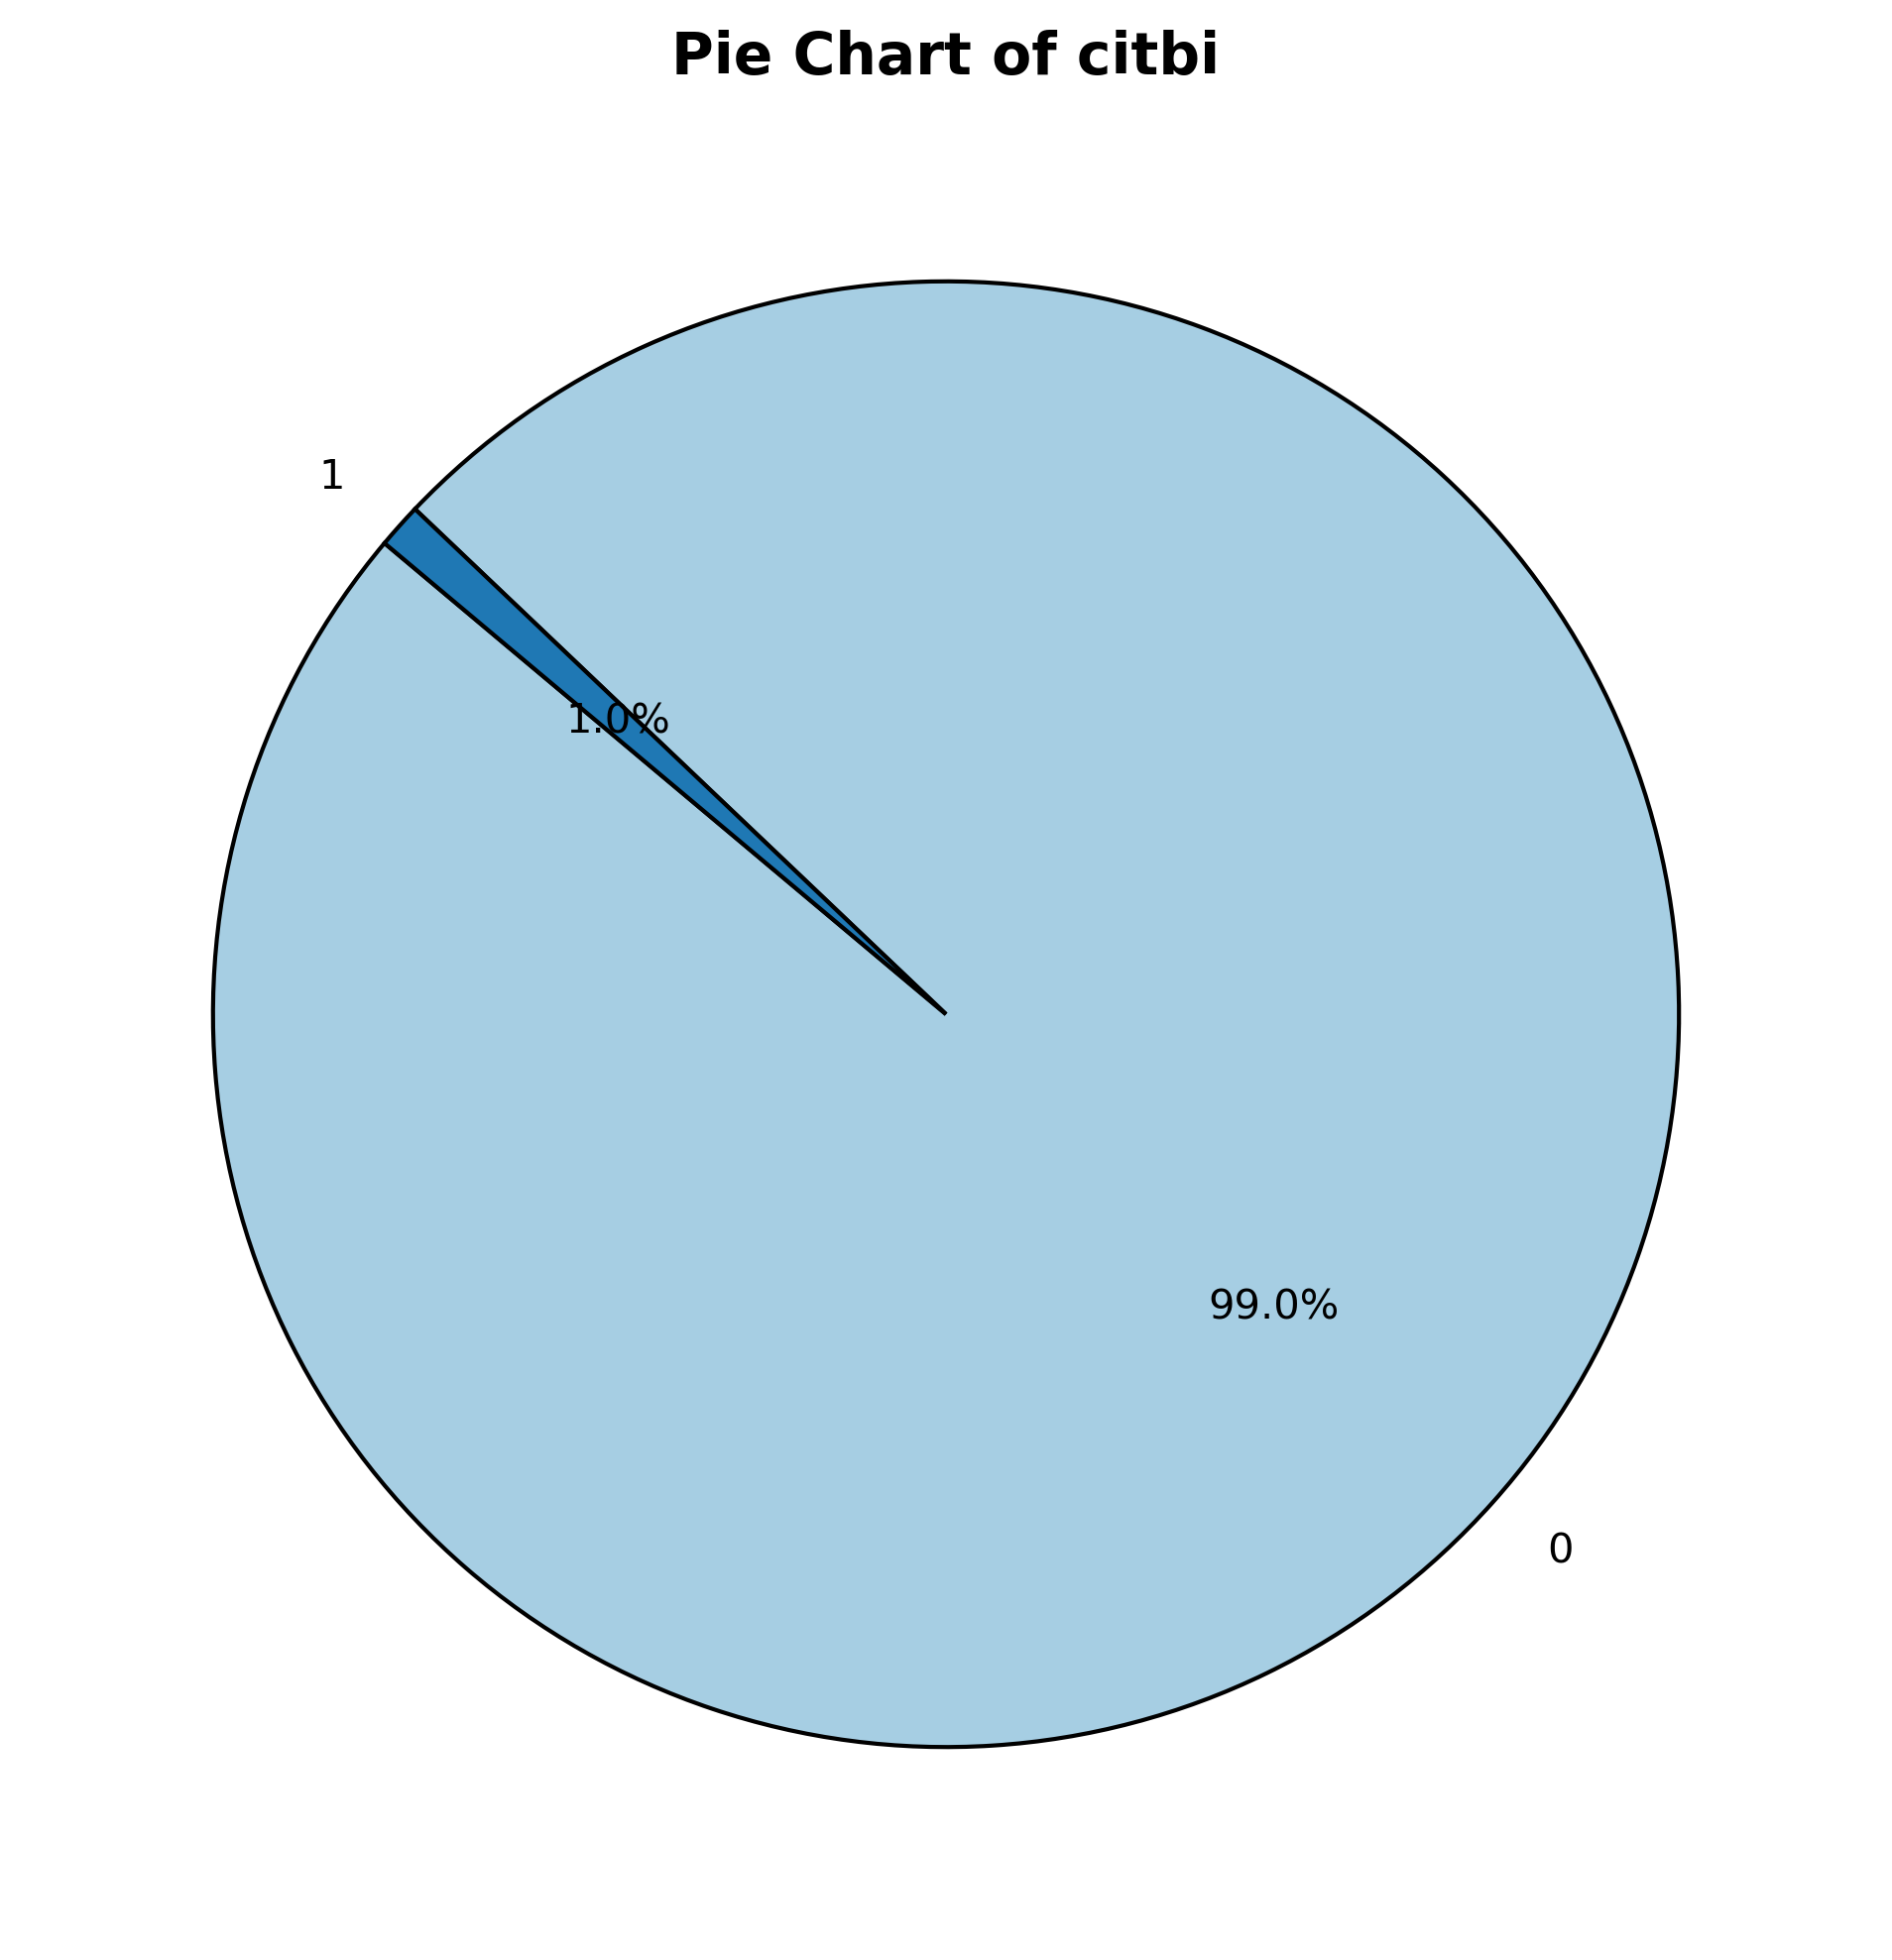

In [2]:
# reality check
#print(df["citbi"].value_counts(normalize=True) * 100) 
#print(df["ct_done"].value_counts(normalize=True) * 100) 
plot_pie_chart(df, 'citbi', '../figures/citbi')

Image saved to ../figures/piechart_gcs_total


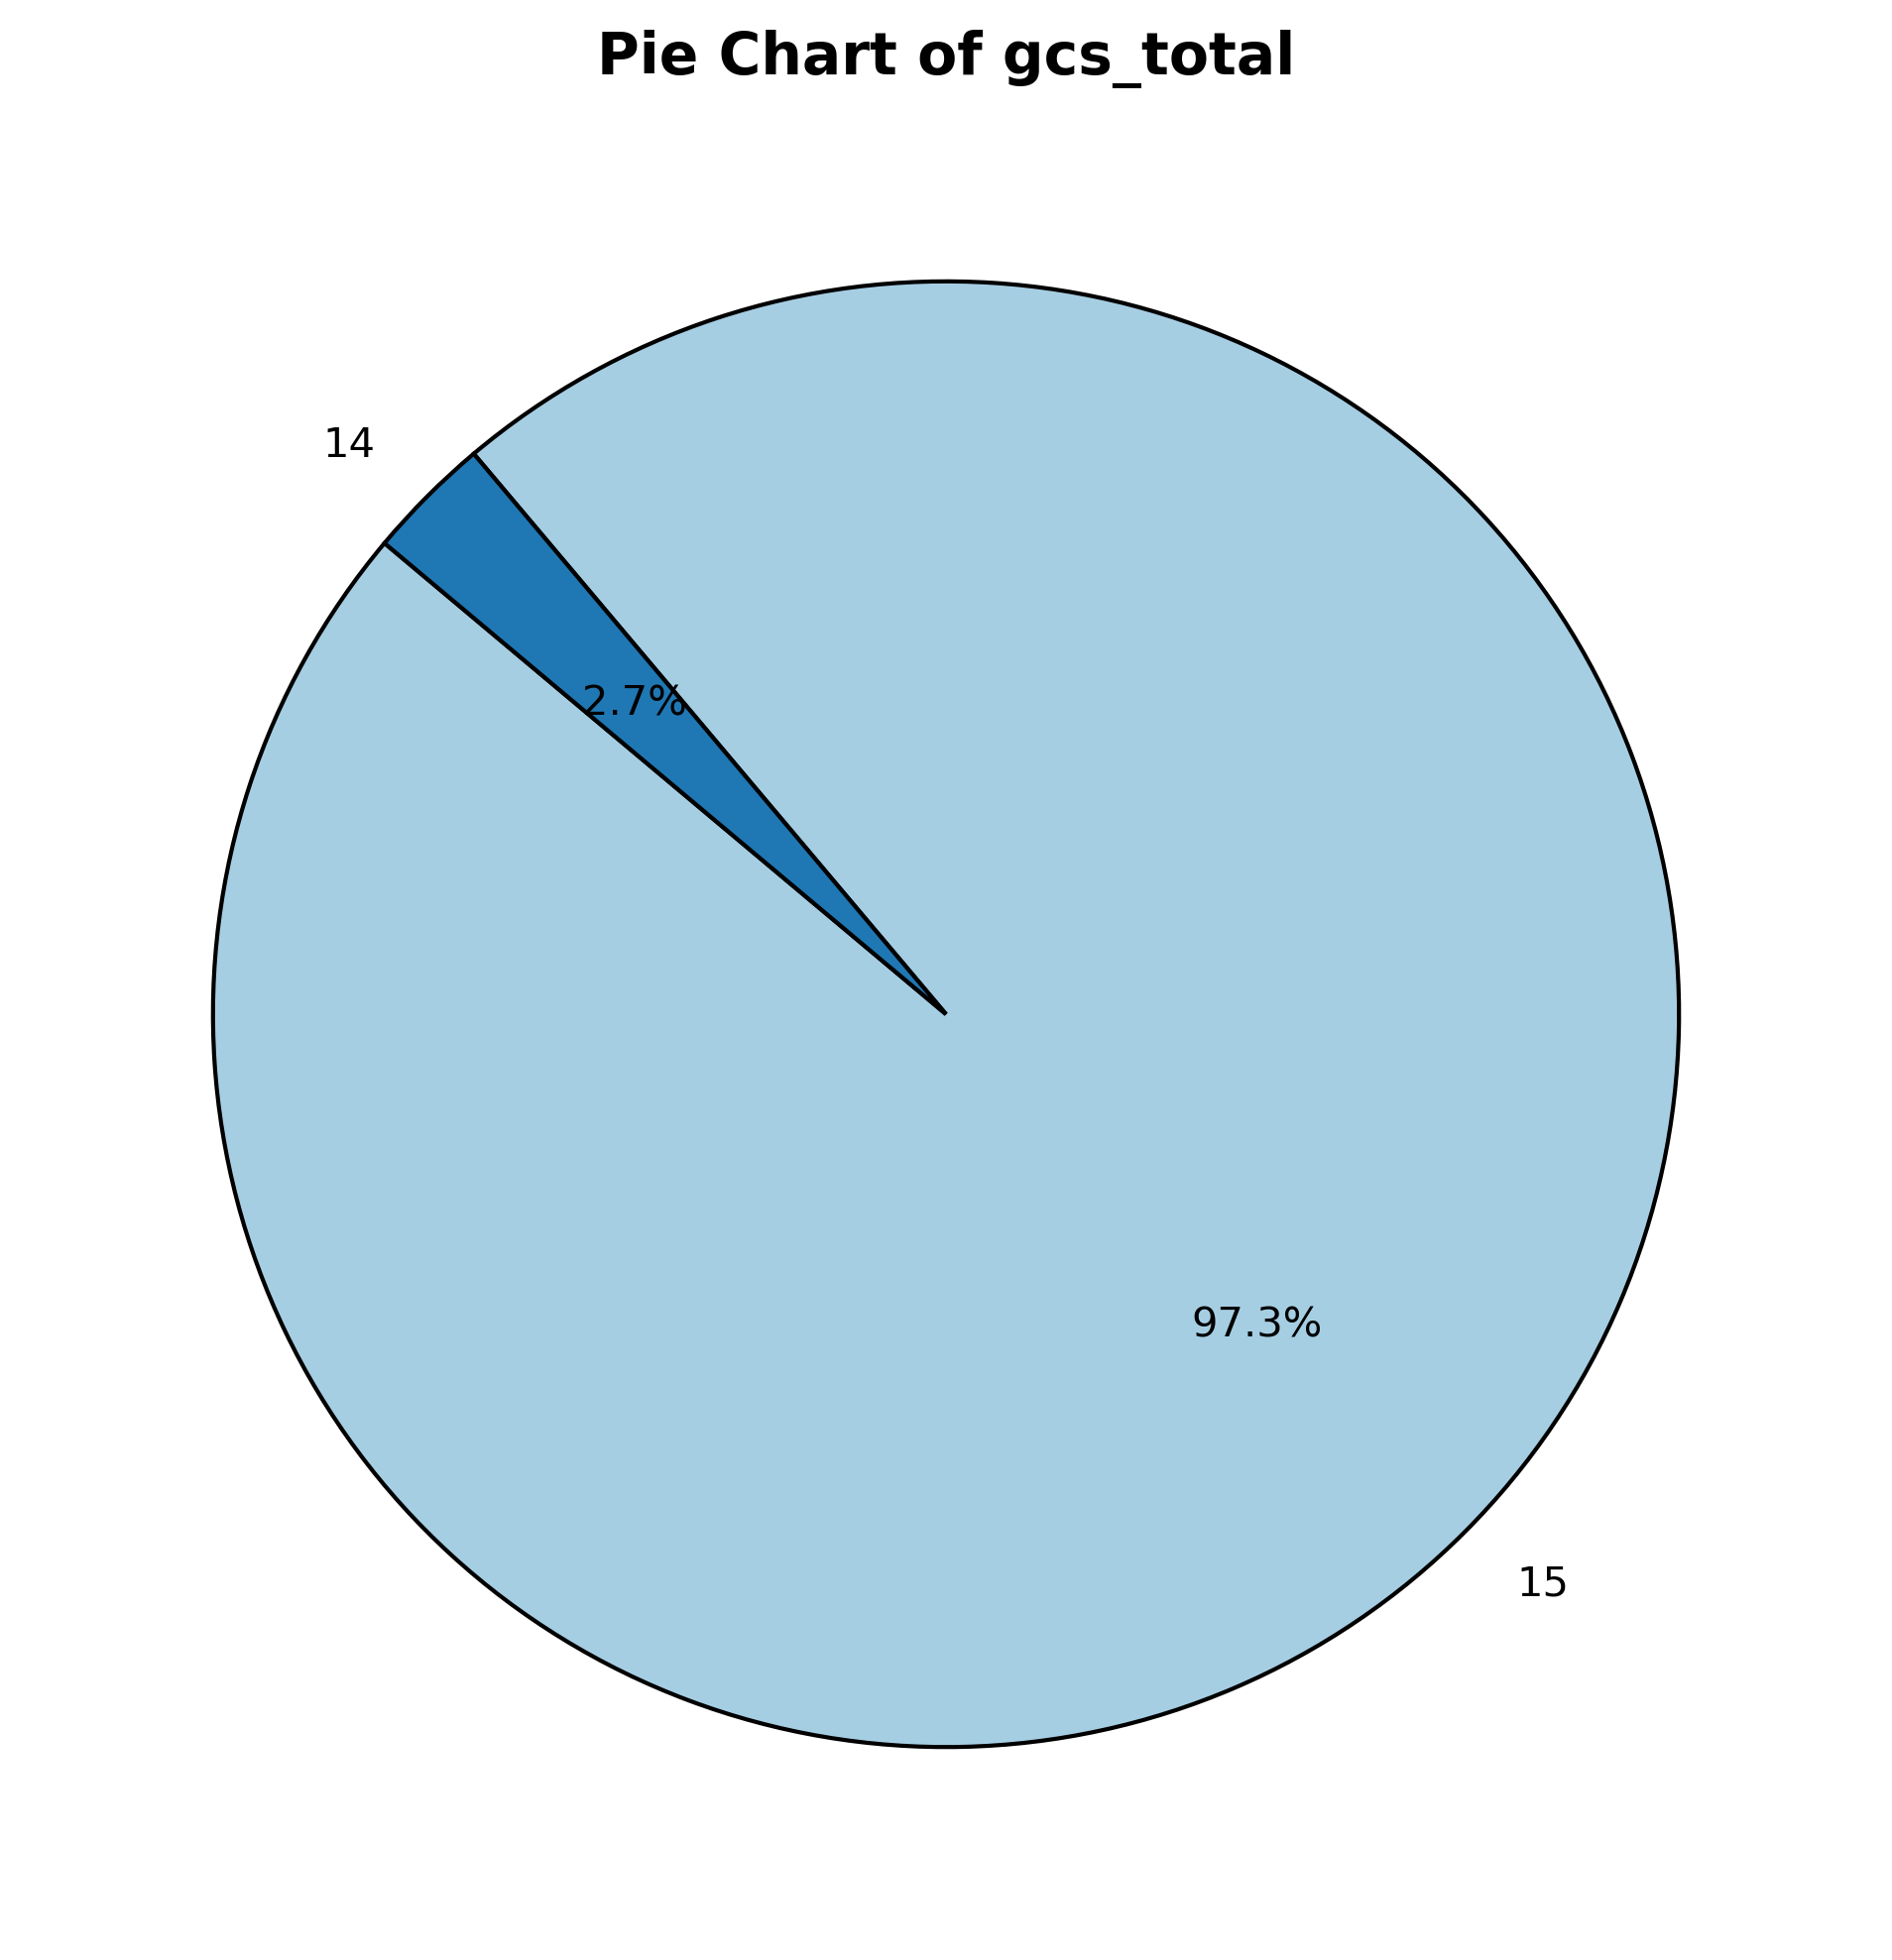

Image saved to ../figures/loc_separate


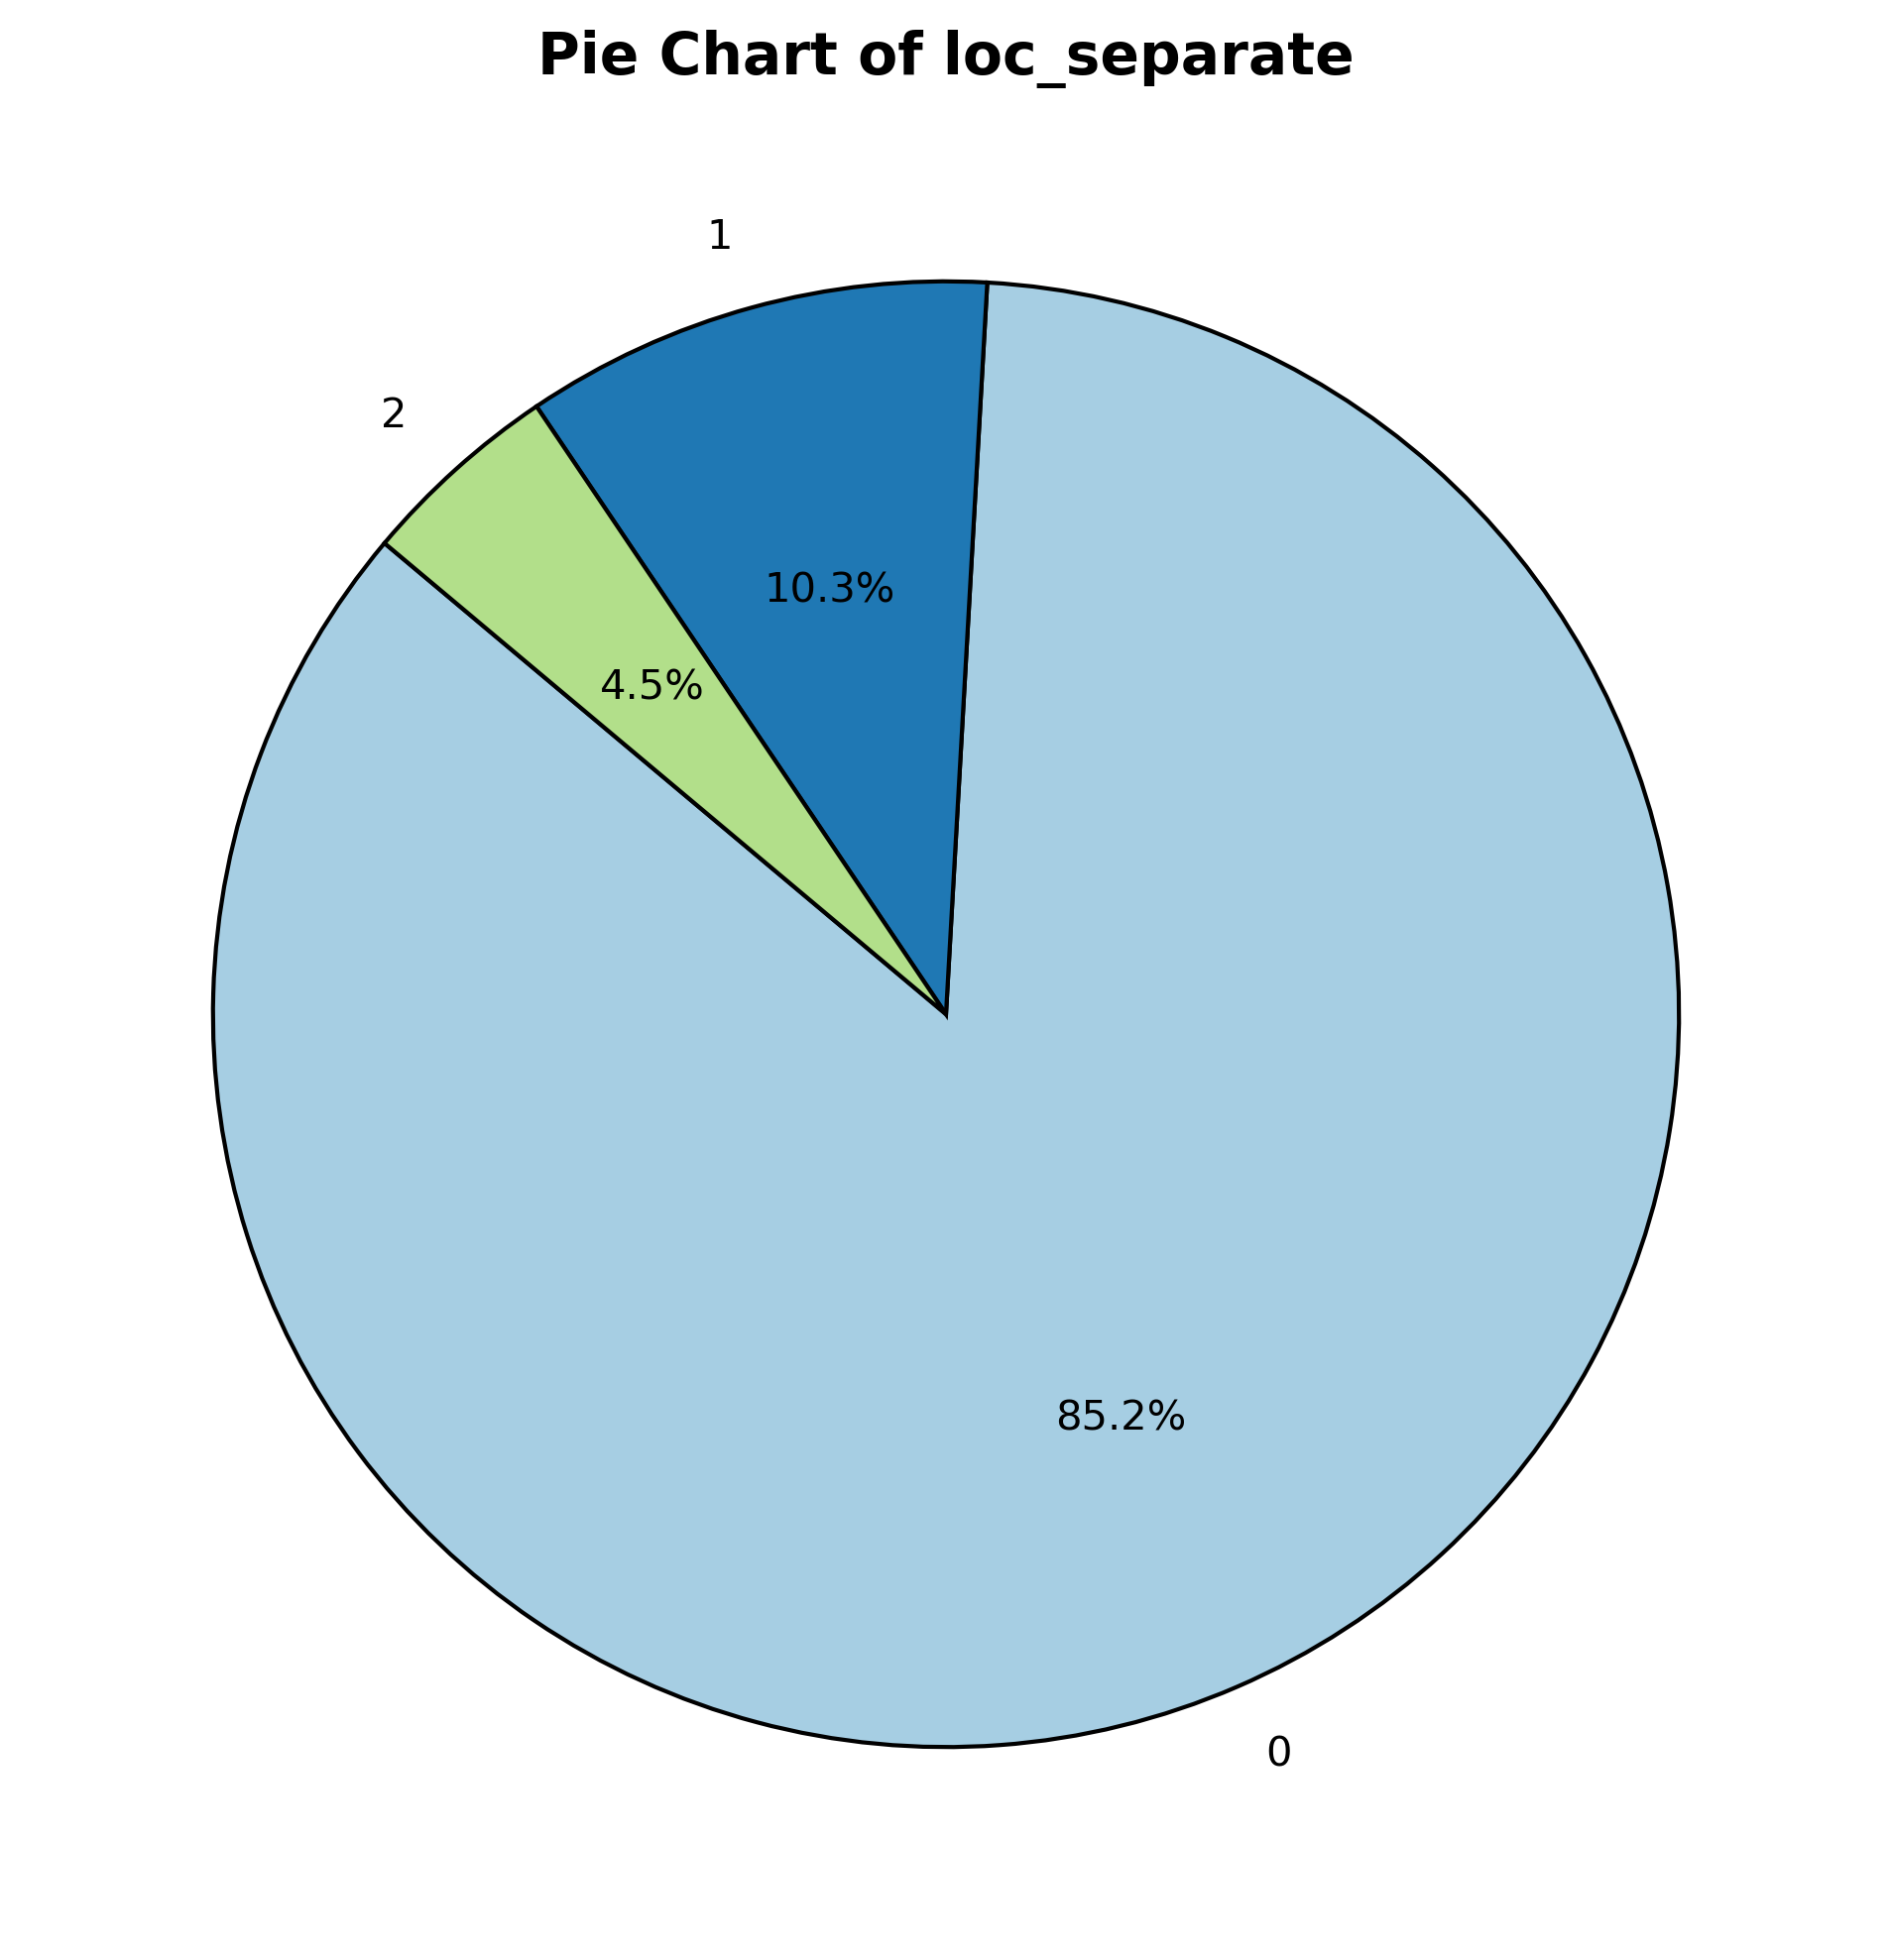

Image saved to ../figures/piechart_vomit


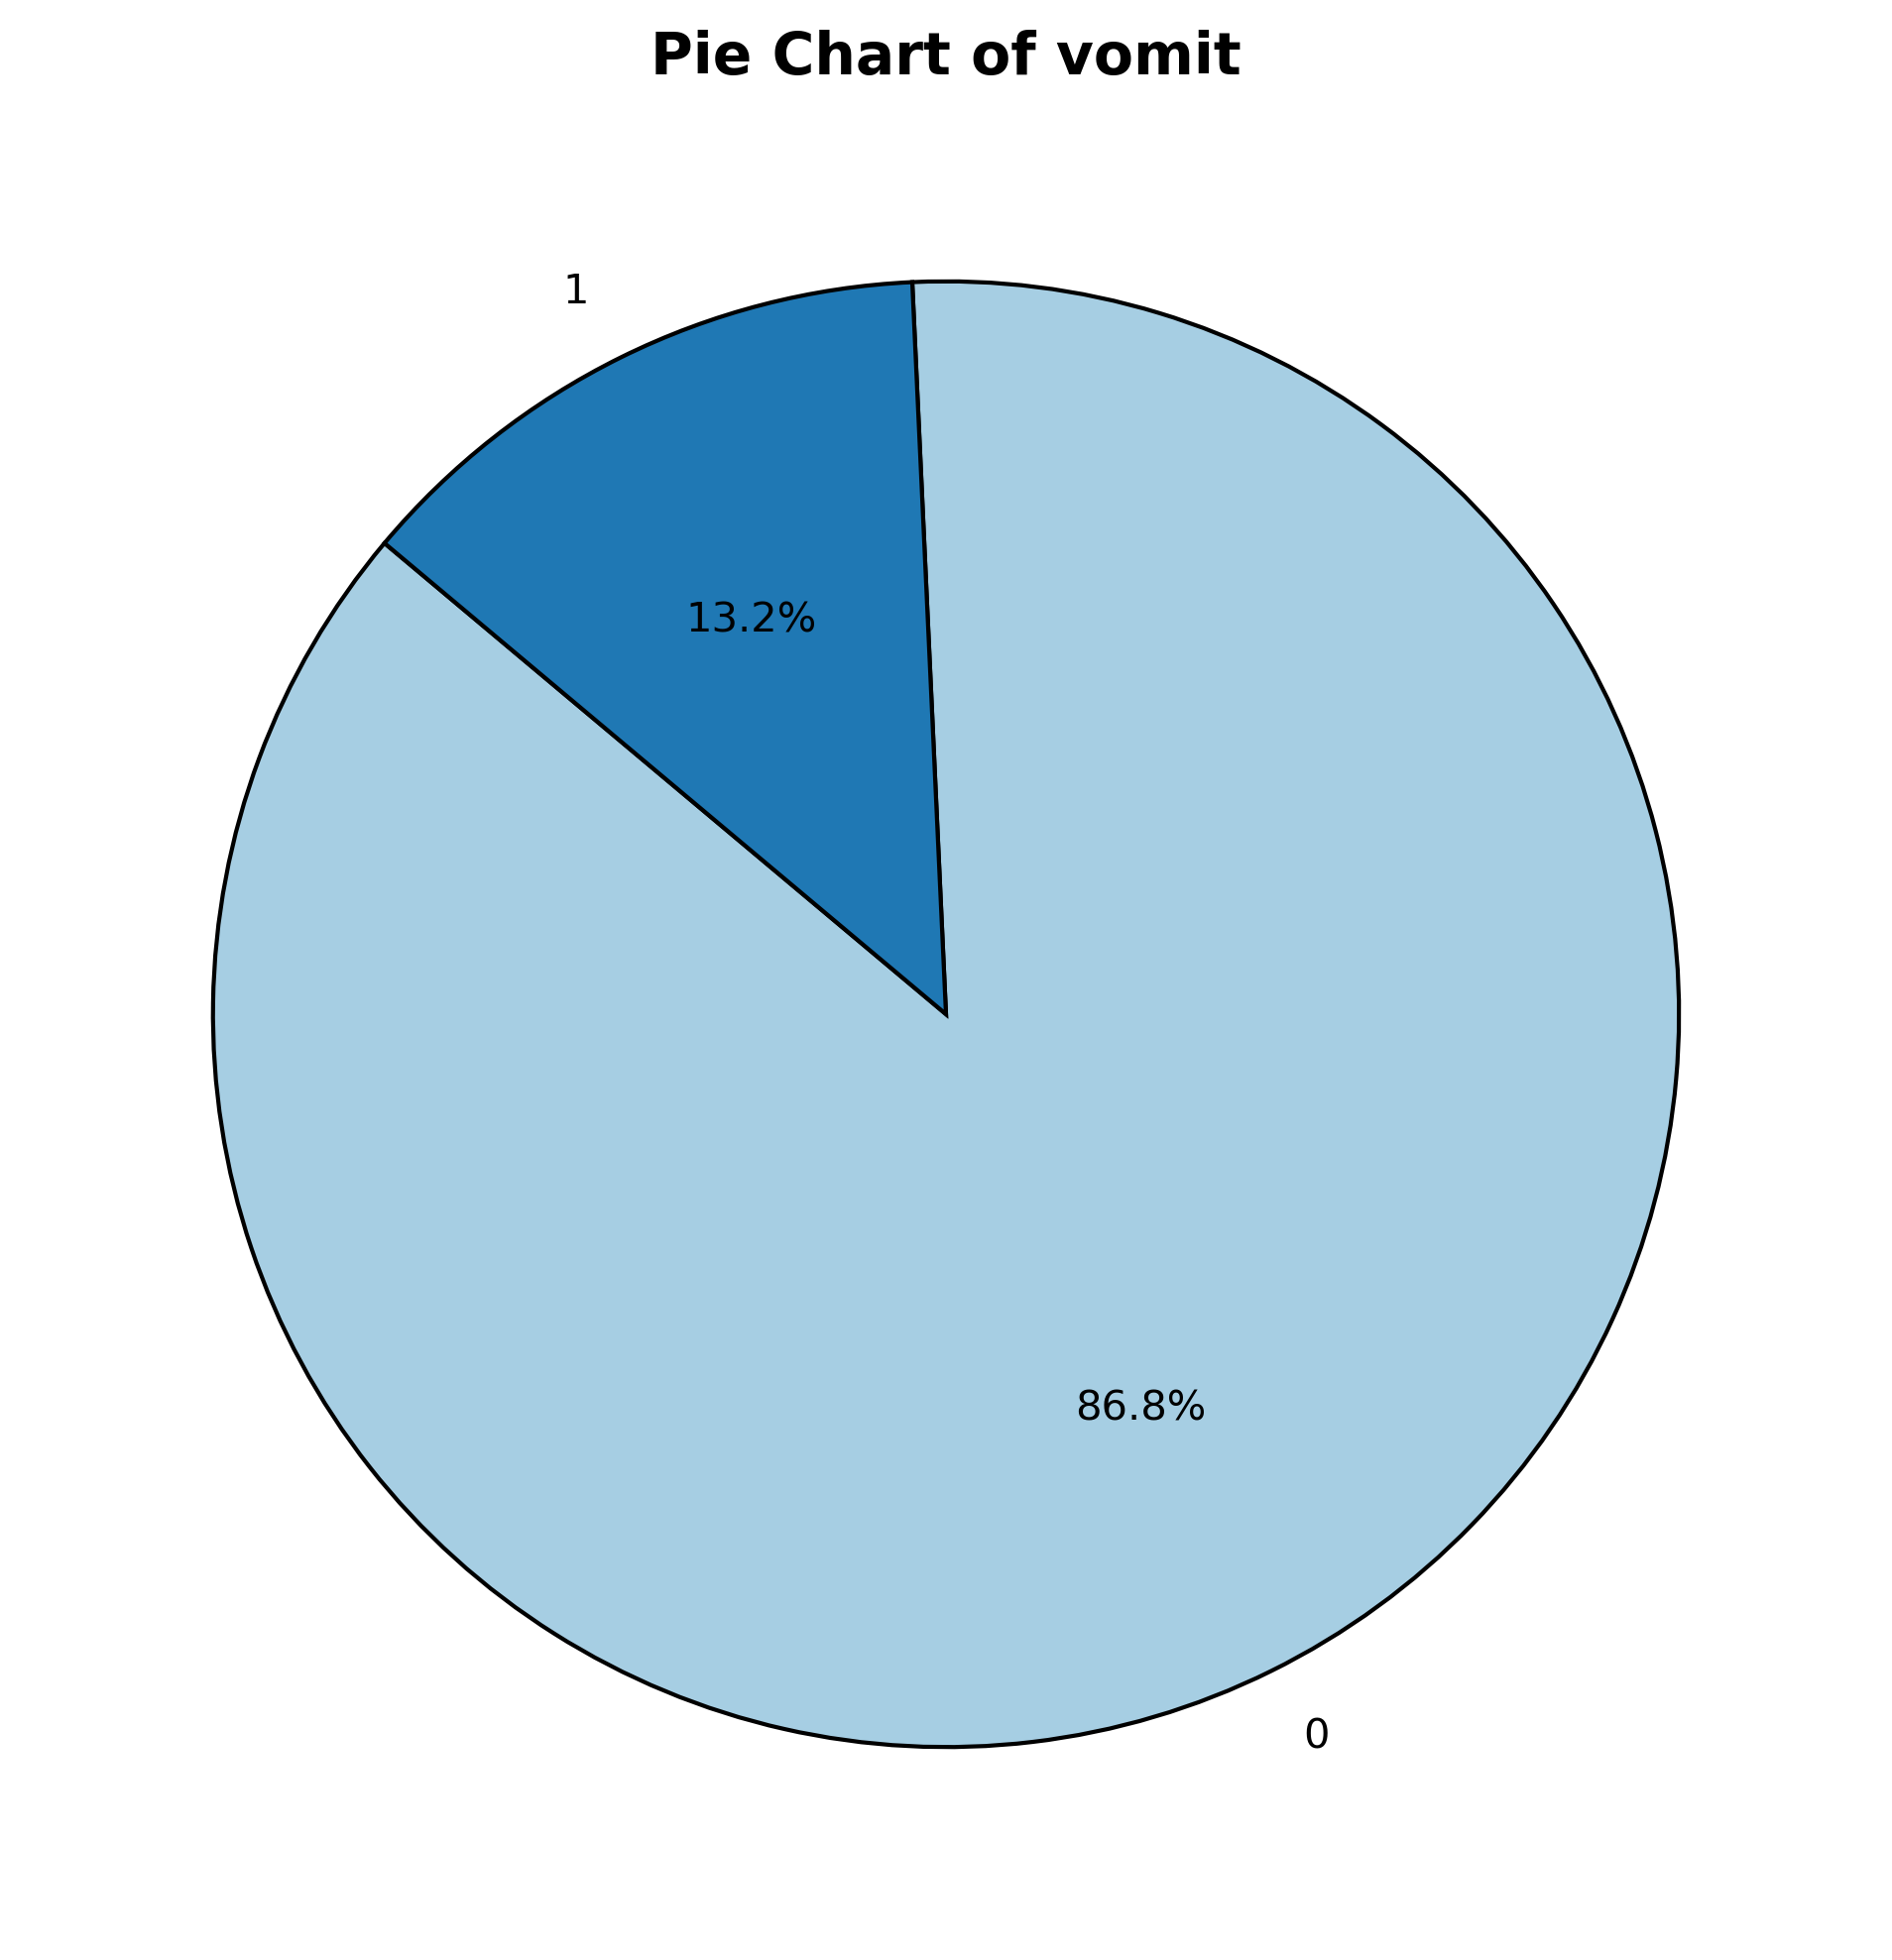

Image saved to ../figures/piechart_ams


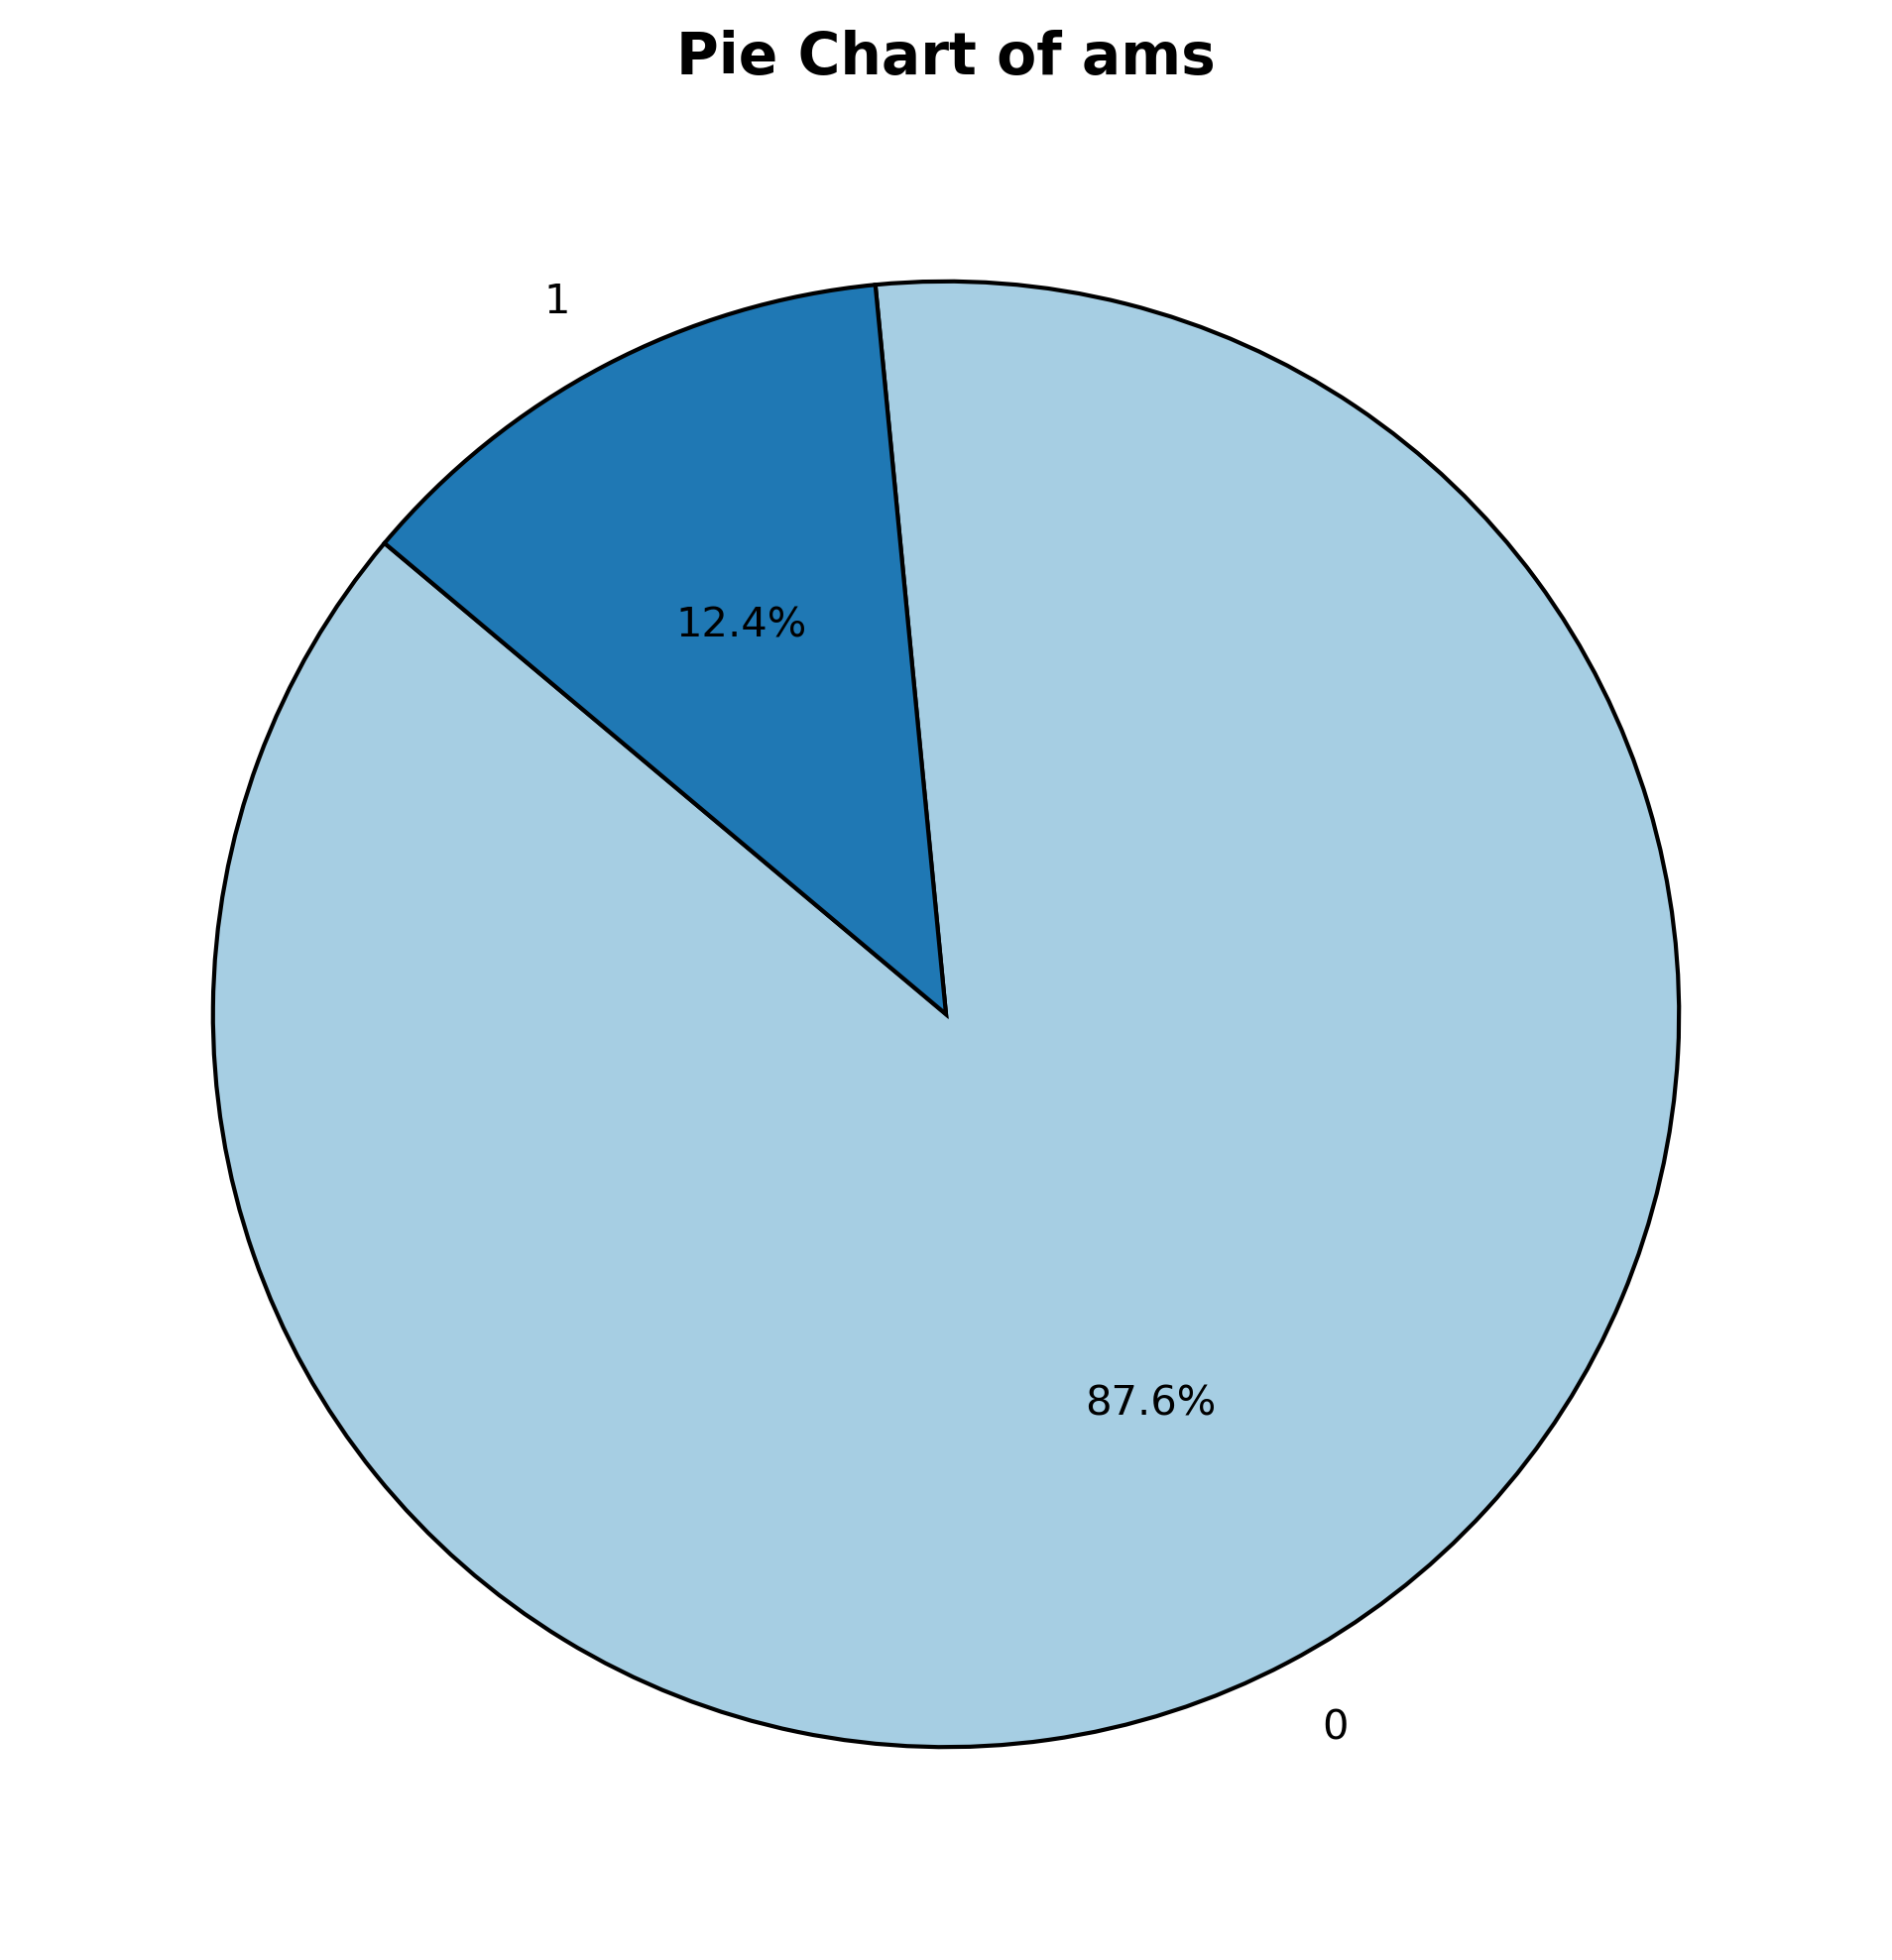

Image saved to ../figures/piechart_ha


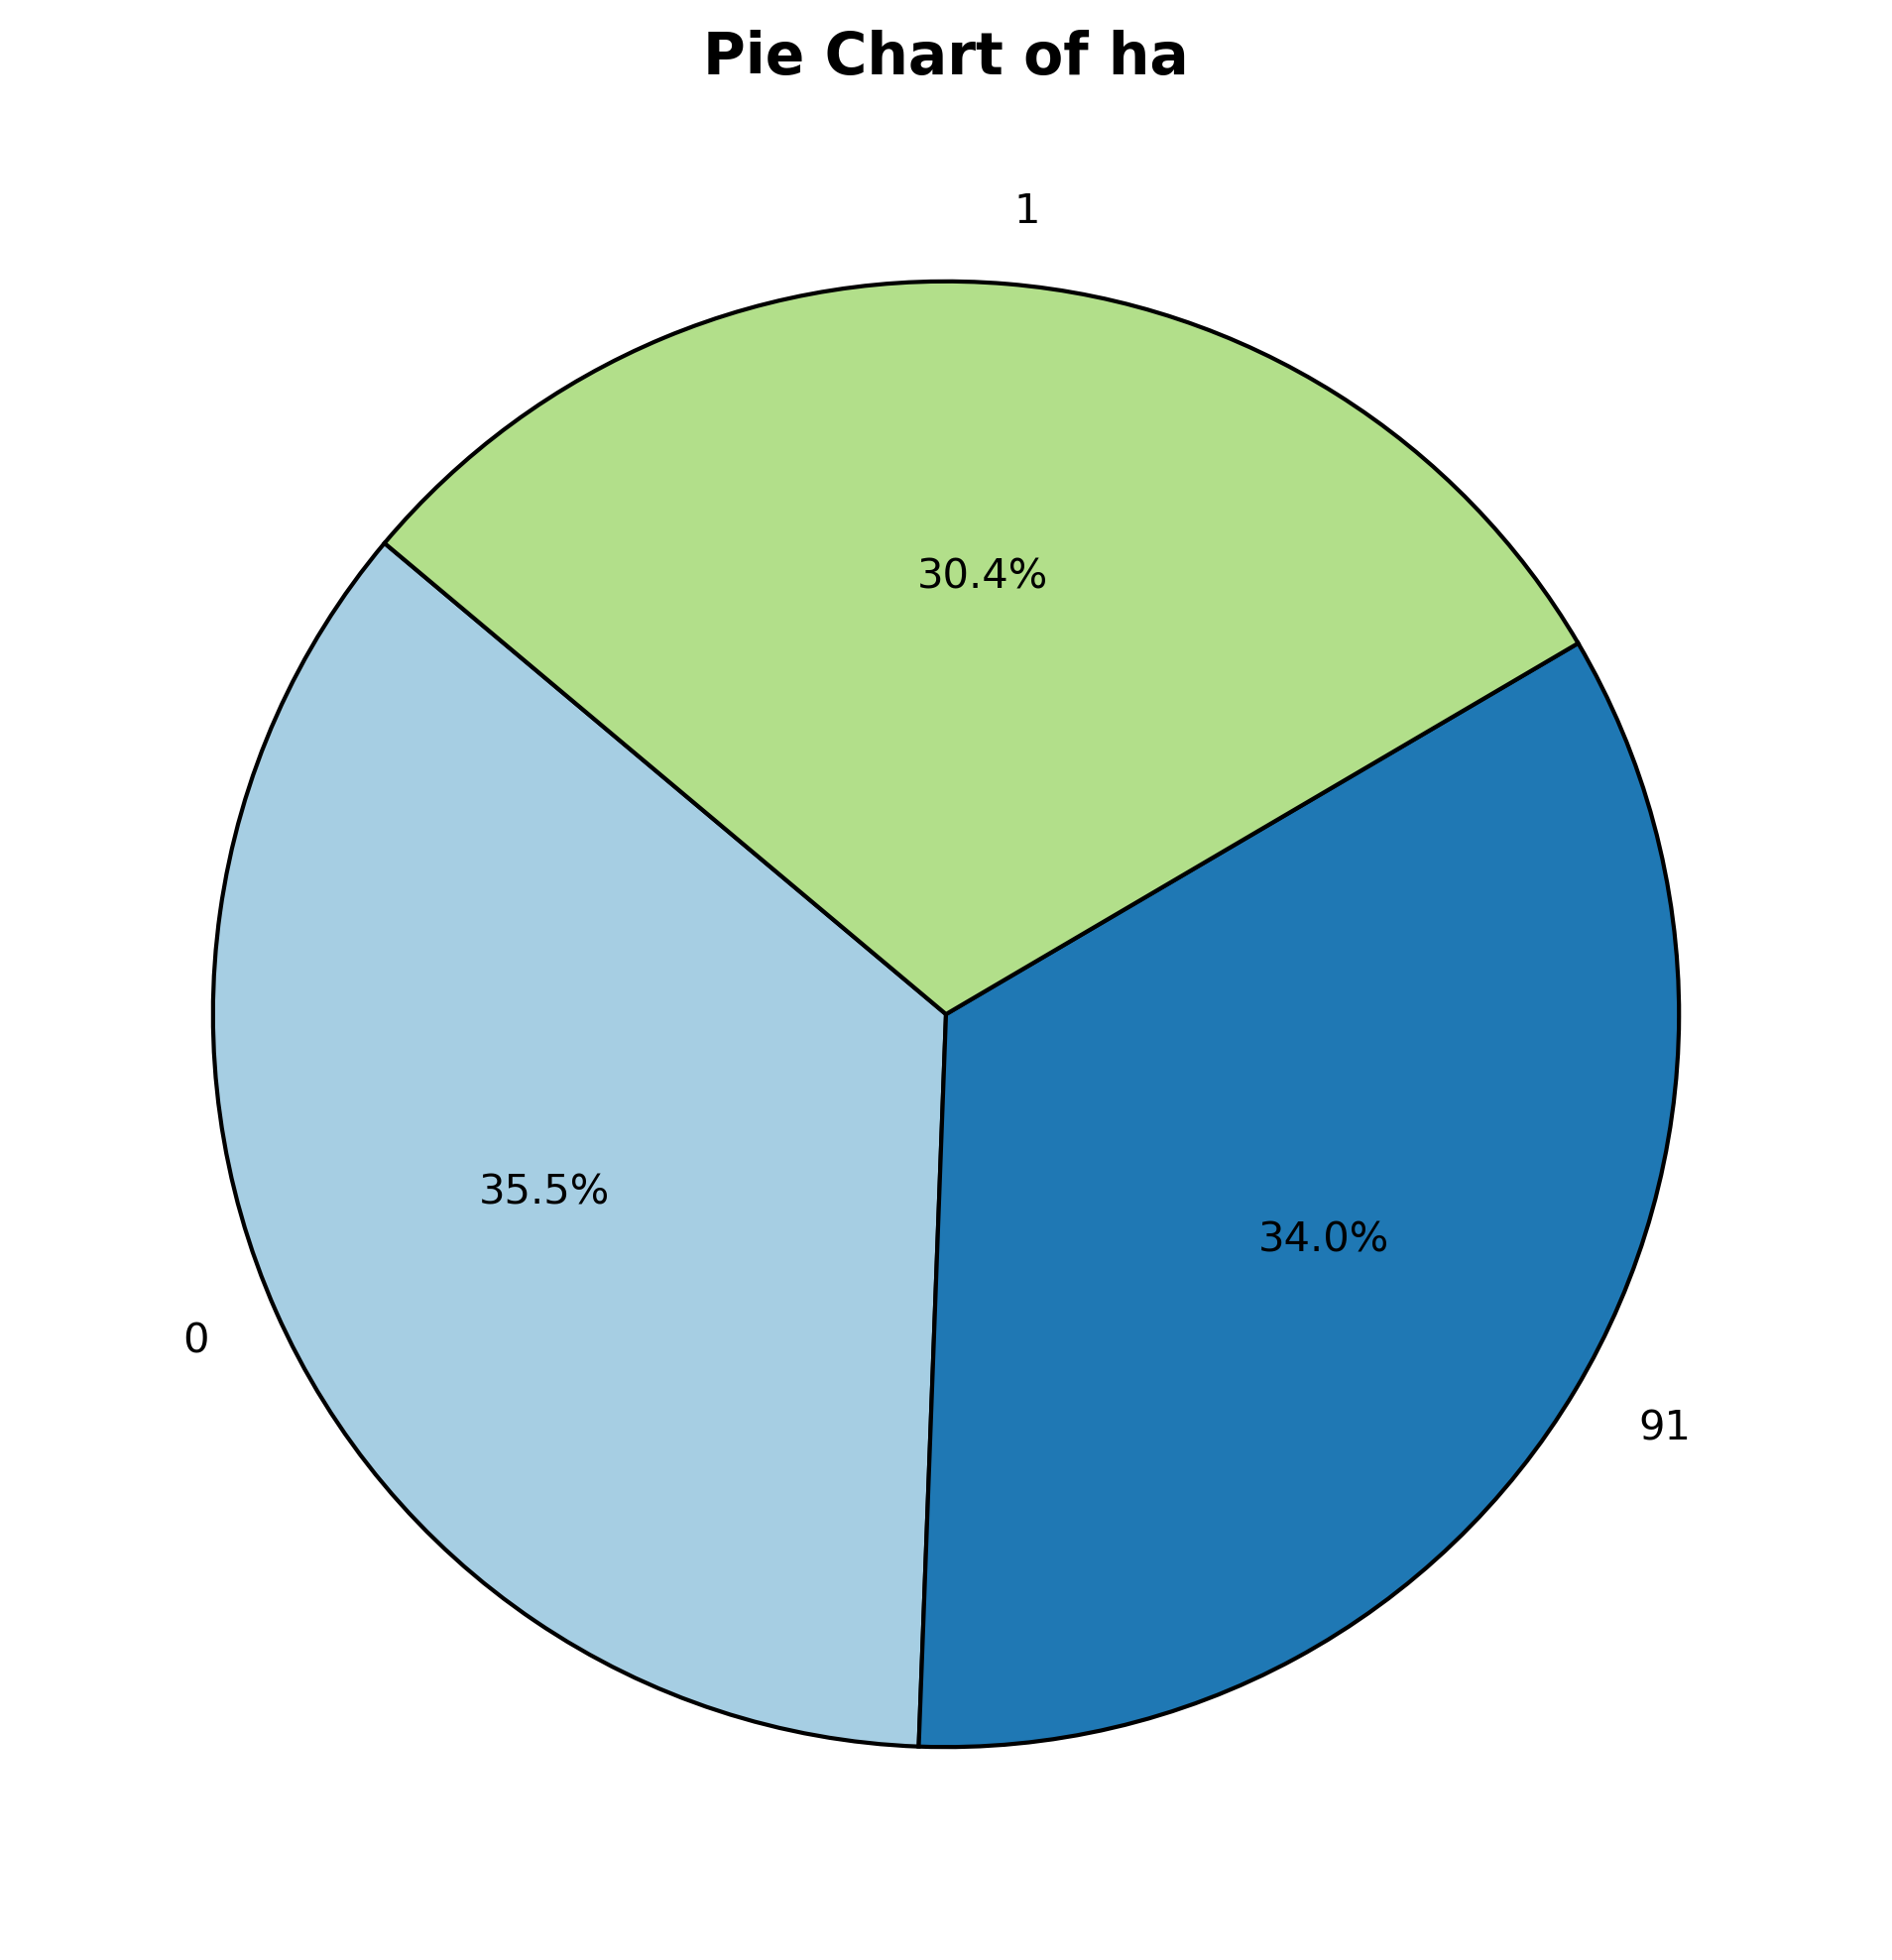

Image saved to ../figures/piechart_sev


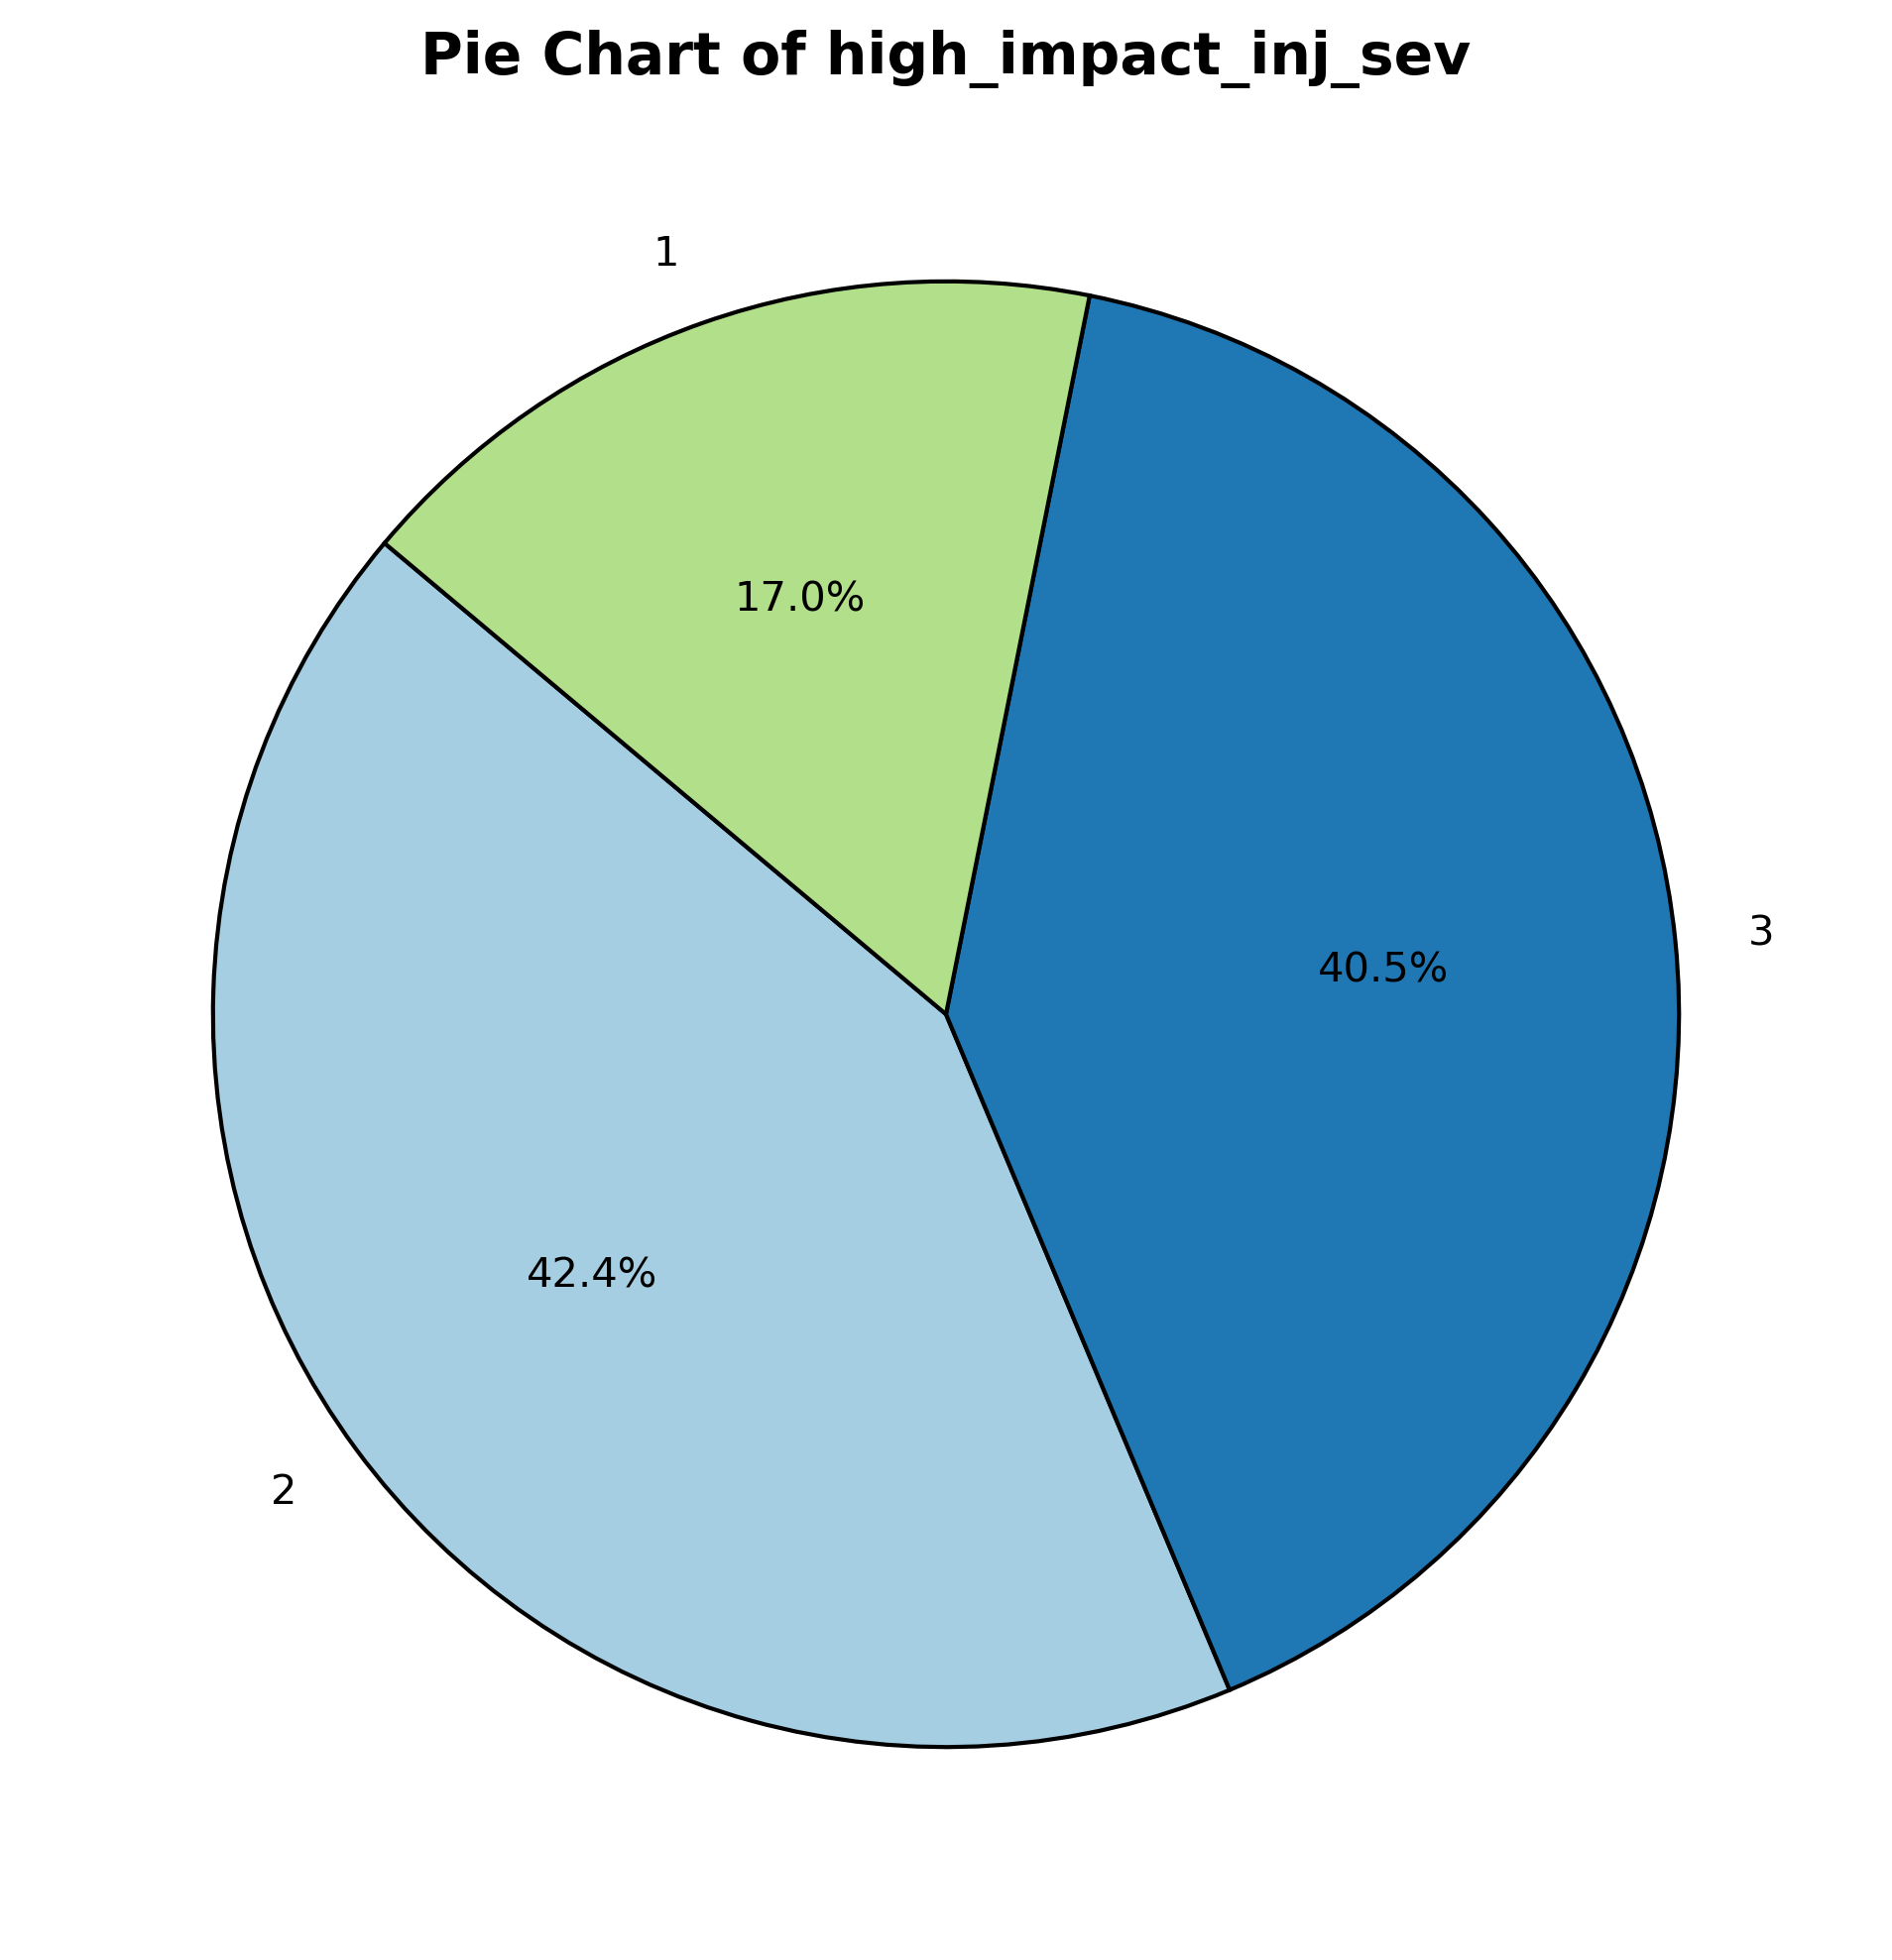

In [3]:
plot_pie_chart(df, 'gcs_total', '../figures/piechart_gcs_total')
plot_pie_chart(df, 'loc_separate', '../figures/loc_separate')
plot_pie_chart(df, 'vomit', '../figures/piechart_vomit')
plot_pie_chart(df, 'ams', '../figures/piechart_ams')
plot_pie_chart(df, 'ha', '../figures/piechart_ha')
plot_pie_chart(df, 'high_impact_inj_sev', '../figures/piechart_sev')

Interesting Fcat 1:

AMS seems to be a really important factor on whether do the CT.

Plot saved to ../figures/barchart_amsctdone


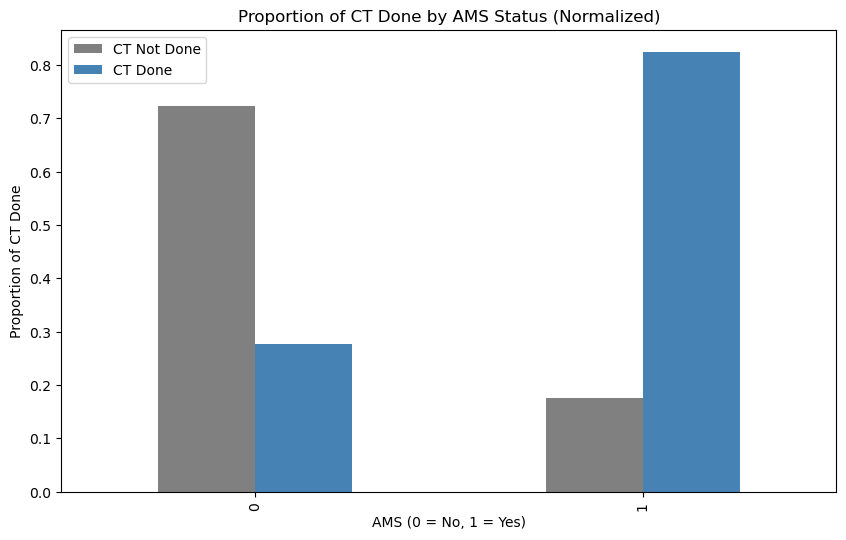

Plot saved to ../figures/barchart_amsctdone_stab


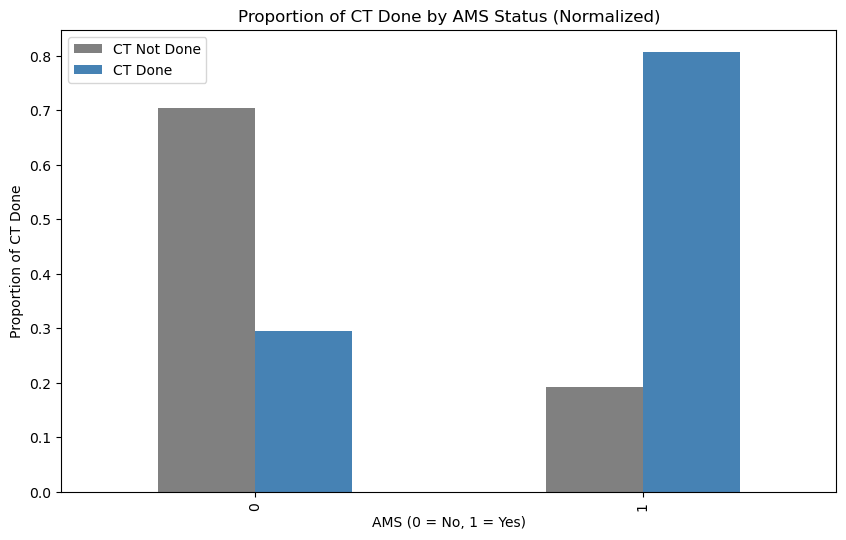

In [4]:
def plot_ct_done_grouped_by_ams(df, save_path=None):
    """
    Plot a grouped bar chart of ct_done, grouped by normalized AMS status.
    
    Parameters:
        df (DataFrame): The input data containing 'ams' and 'ct_done' columns.
        save_path (str, optional): The file path to save the plot. If None, the plot will just be shown.
    """
    ams_ct_done_counts = df.groupby("ams")["ct_done"].value_counts(normalize=True).unstack()
    ax = ams_ct_done_counts.plot(kind="bar", stacked=False, figsize=(10, 6), color=["#808080", "#4682B4"])
    
    plt.xlabel("AMS (0 = No, 1 = Yes)")
    plt.ylabel("Proportion of CT Done")
    plt.title("Proportion of CT Done by AMS Status (Normalized)")
    plt.legend(["CT Not Done", "CT Done"])
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches="tight")
        print(f"Plot saved to {save_path}")
    
    plt.show()
plot_ct_done_grouped_by_ams(df, '../figures/barchart_amsctdone')
plot_ct_done_grouped_by_ams(df1, '../figures/barchart_amsctdone_stab')

Interesting Fact 2:

There only 0.1% of patients need neurosurgery, but there are 34.5% of patient have CT done.

Image saved to ../figures/ctdone


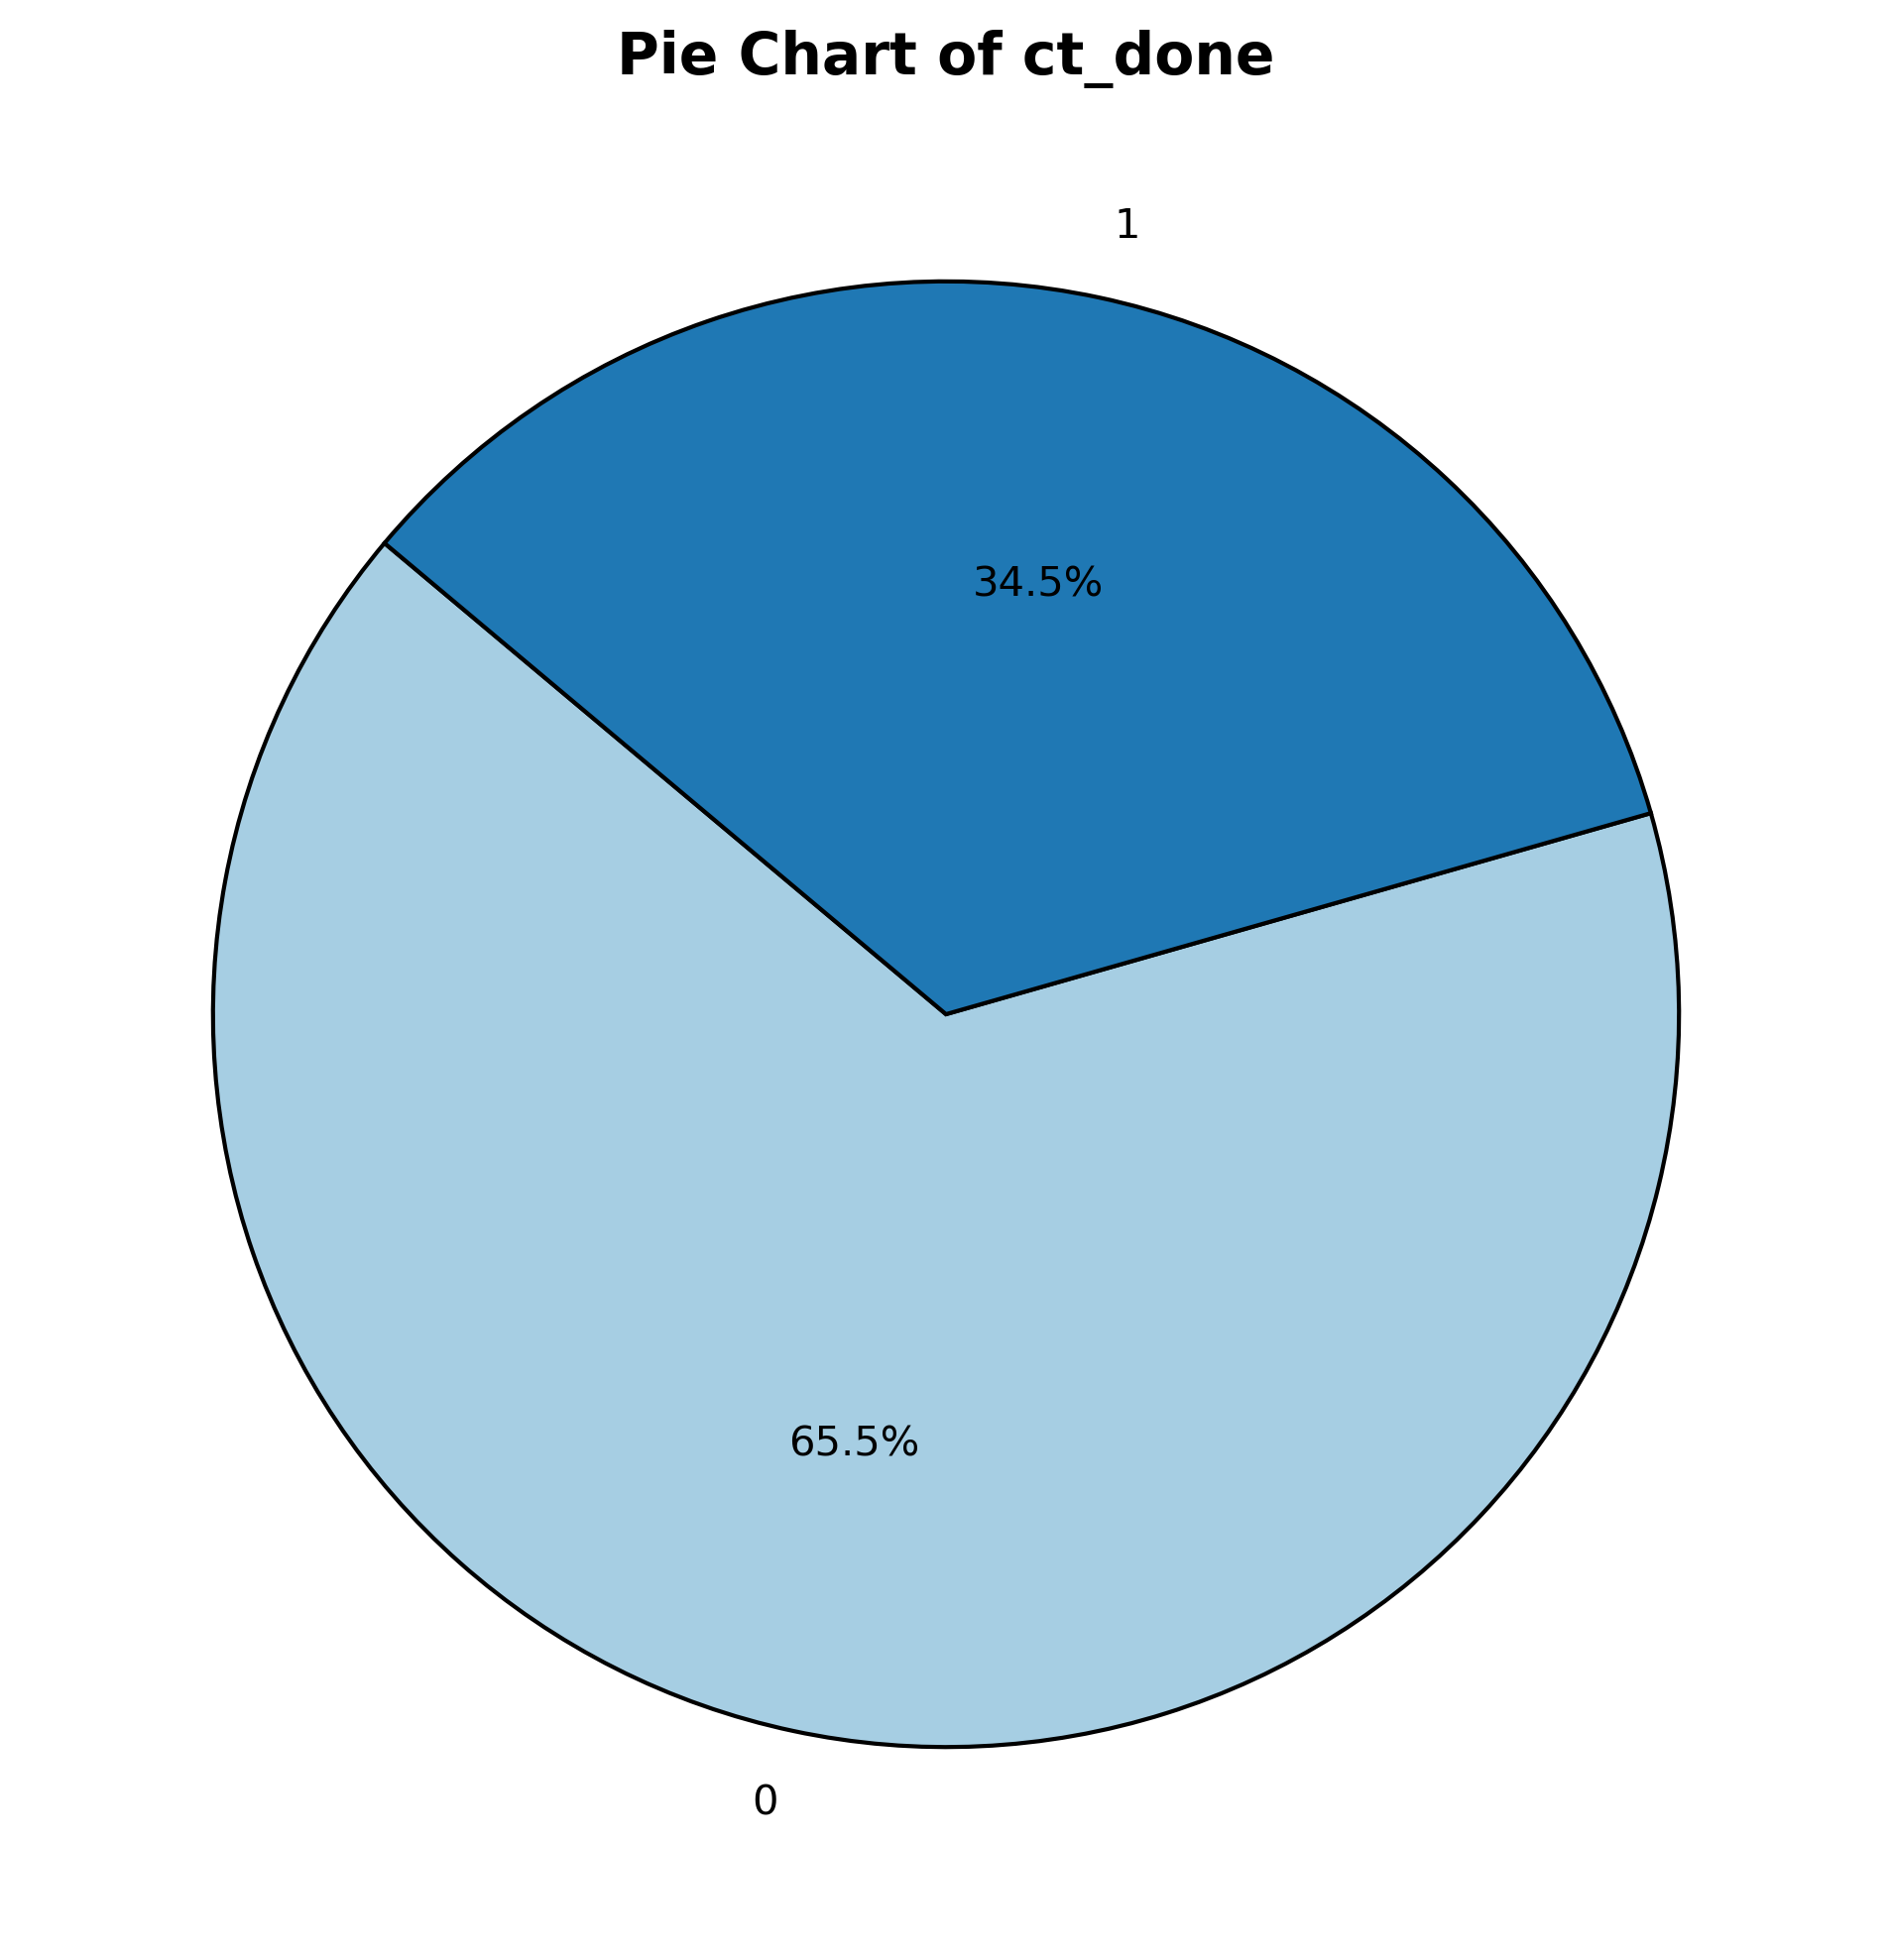

Image saved to ../figures/neurosurgery


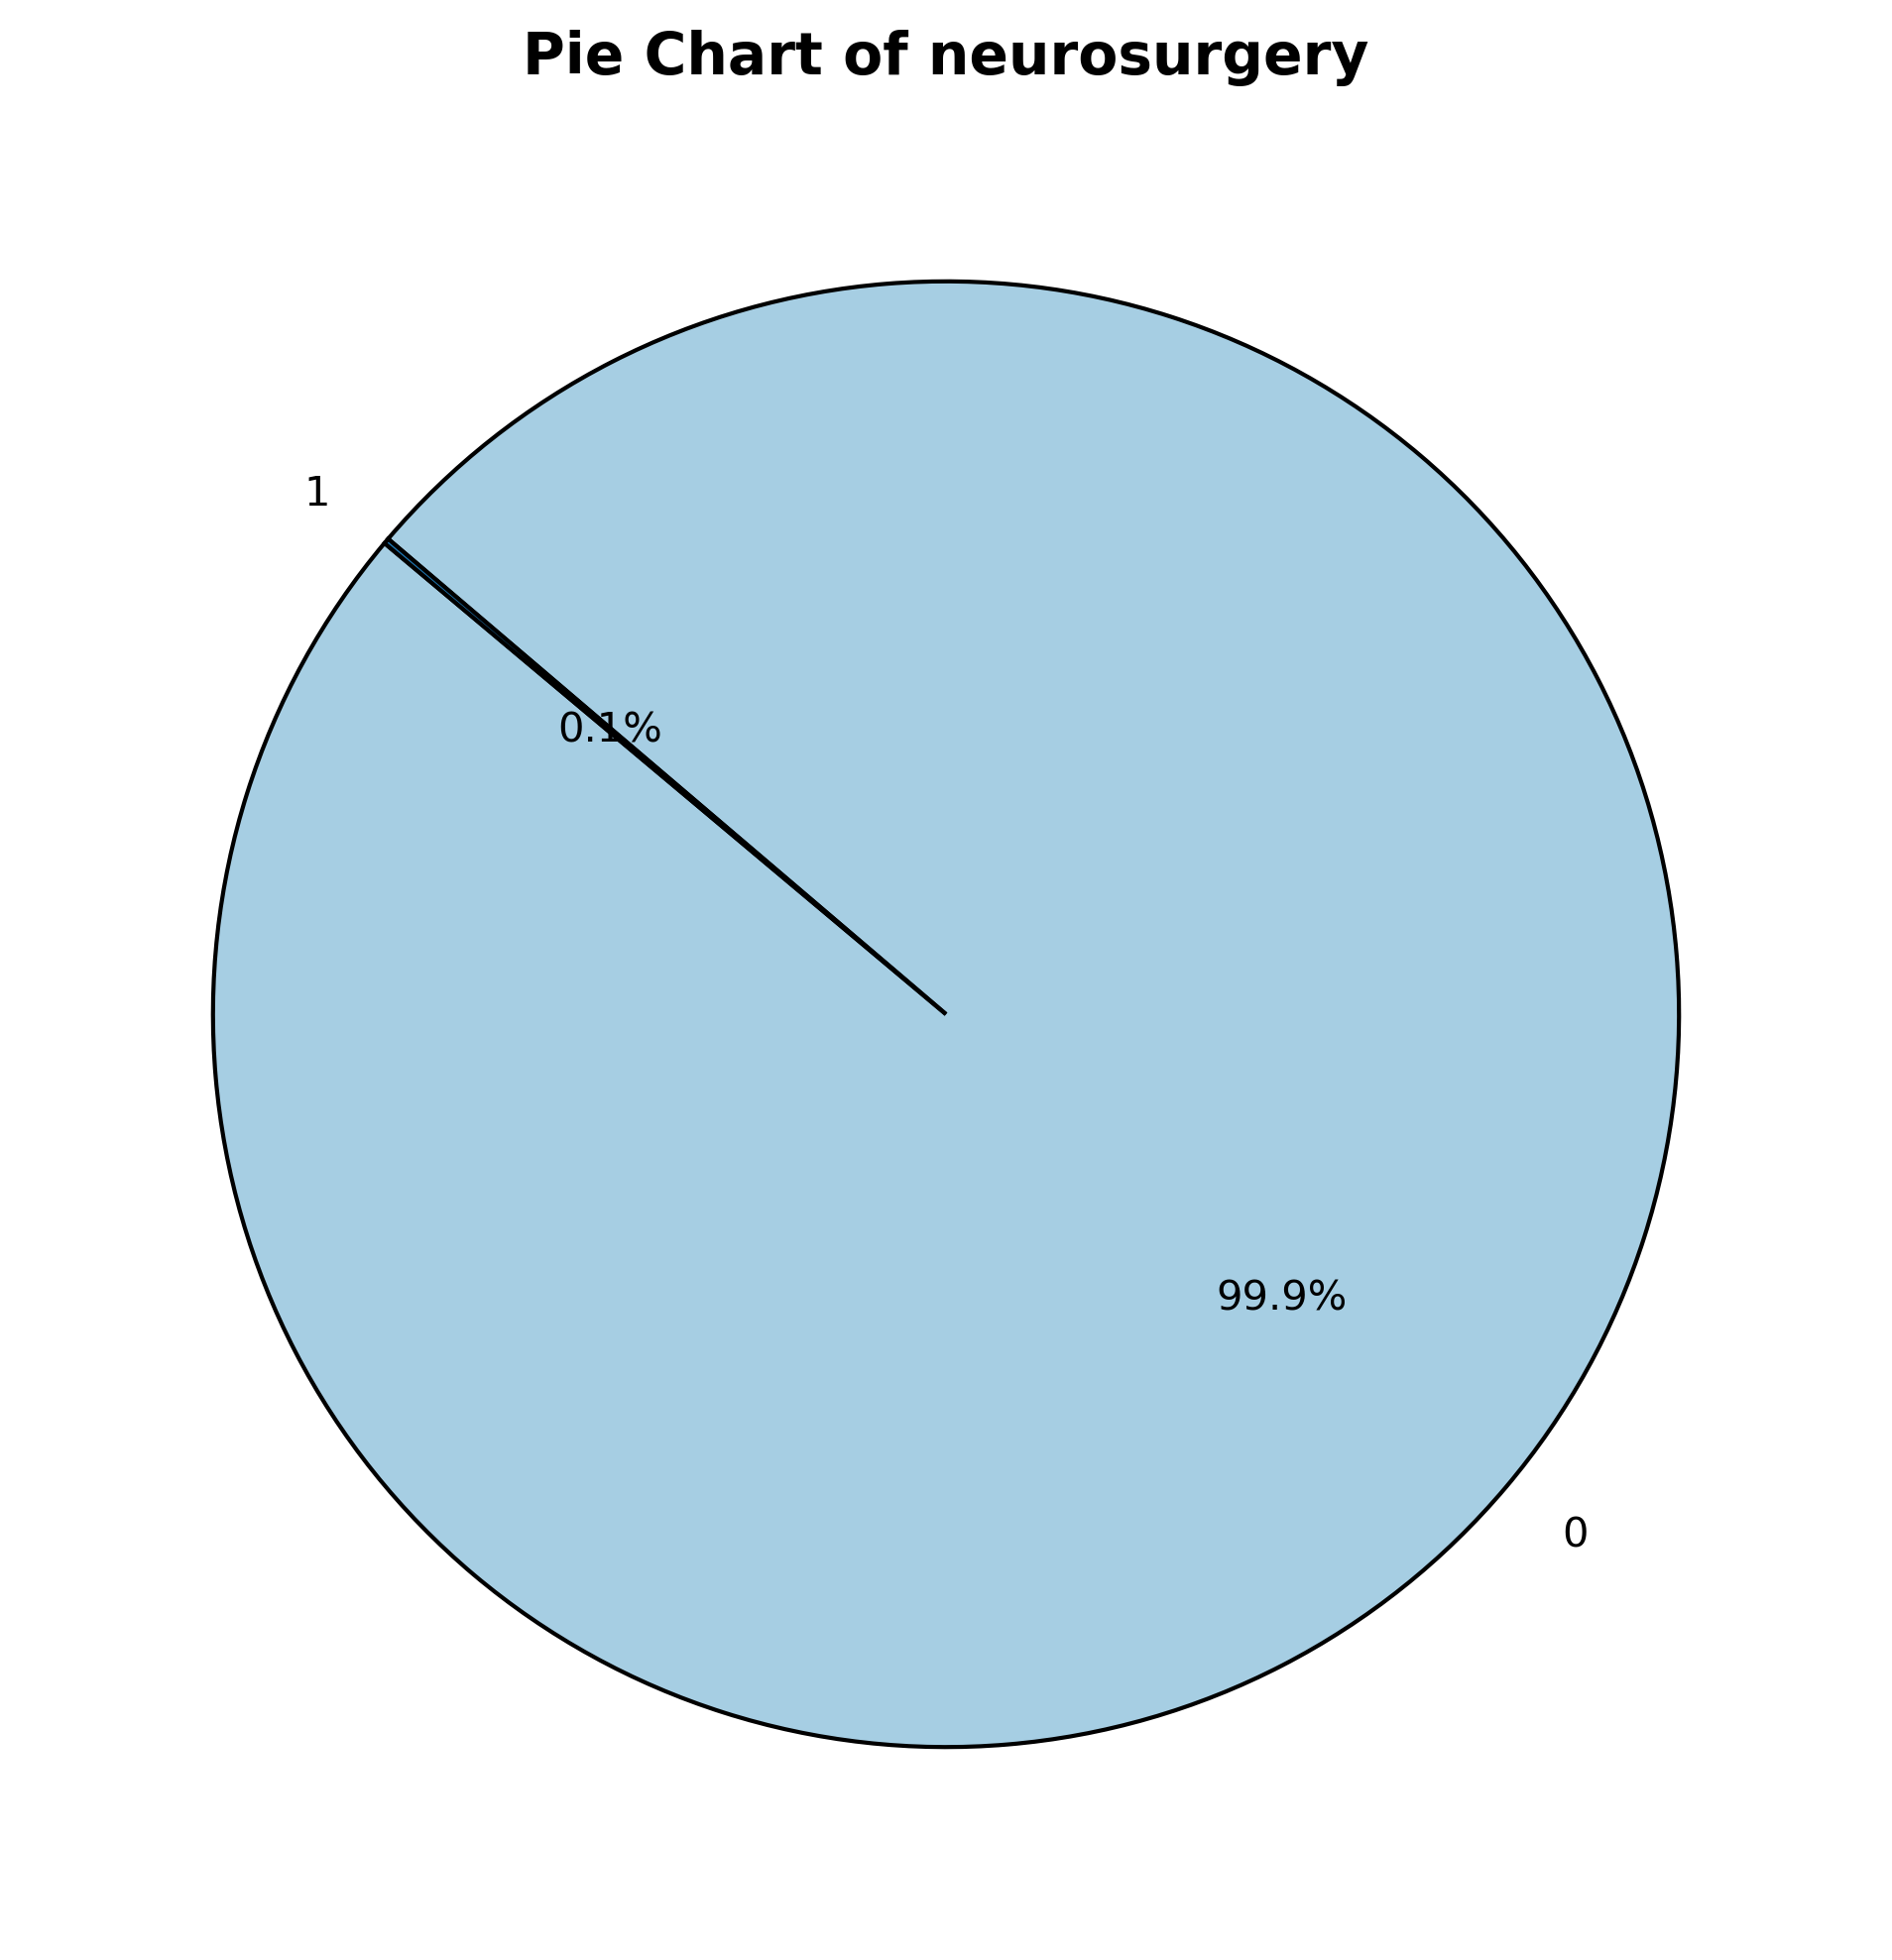

In [5]:
plot_pie_chart(df, 'ct_done', '../figures/ctdone')
plot_pie_chart(df, 'neurosurgery', '../figures/neurosurgery')

Interesting Fact 3:

Gcs score do have a strong relationship with ciTBI

Plot saved to ../figures/GCS_ciTBI


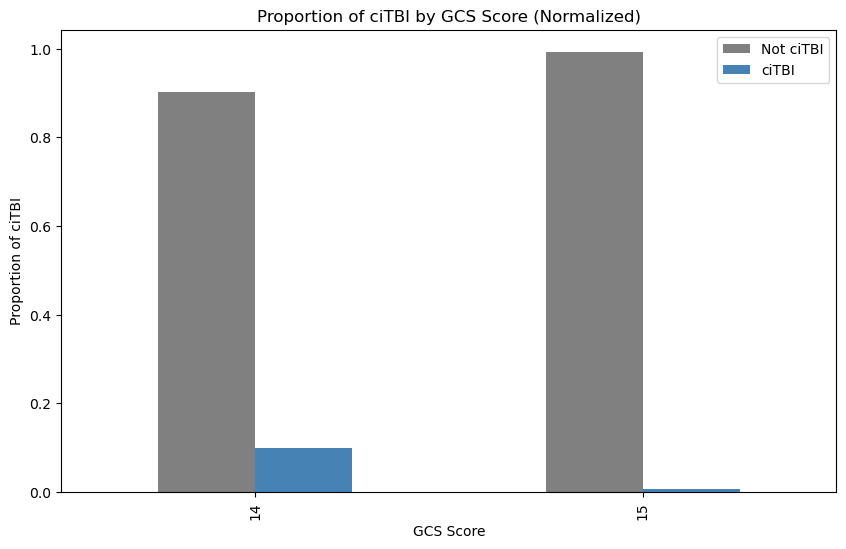

In [6]:
def plot_citbi_grouped_by_gcs(df, save_path=None):
    ams_ct_done_counts = df.groupby("gcs_total")["citbi"].value_counts(normalize=True).unstack()
    ax = ams_ct_done_counts.plot(kind="bar", stacked=False, figsize=(10, 6), color=["#808080", "#4682B4"])
    
    plt.xlabel("GCS Score")
    plt.ylabel("Proportion of ciTBI")
    plt.title("Proportion of ciTBI by GCS Score (Normalized)")
    plt.legend(["Not ciTBI", "ciTBI"])
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches="tight")
        print(f"Plot saved to {save_path}")
    
    plt.show()
plot_citbi_grouped_by_gcs(df, '../figures/GCS_ciTBI')